In [59]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import os 
import subprocess
import matplotlib as mtl
sys.path.append('/Users/u4855540/Desktop/PTE_Data/ER/')
import PyEnsembleRefinement as er 
import averageAnalysis as aa
import pandas as pd

In [60]:
#DEFINE PDB NAMES AND ORDER and TRAJECTORIES

pdb_dict={'4PCP':'R0',
            '4XAF':'R1',
            '4XD5':'R2',
            '4XAG':'R6',
            '4XAY':'R8',
            '4XAZ':'R18',
            '4PCN':'R22',
            '4PBE':'Rev6',
            '4PBF':'Rev12',
            '4XD6':'E2a',
            '4XD3':'E3',
            '5W6B':'S1',
            '5WCQ':'S2',
            '5WCW':'S3',
            '5WIZ':'S5',
            '5WCP':'S6',
            '5WMS':'S7',
            '6AML':'S8',
            '6B2F':'S5+HLN',
            '5WJ0':'S5+254R',
            '6BH7':'R18+254S',
            '6BHL':'S5ΔL7',
            '6BHK':'R18ΔL7',
            '5WCR':'PTE(WT)ΔL7'}

input_pdbs = [key for key in pdb_dict]

Rtraj=['4PCP','4XAF','4XD5','4XAG', '4XAY','4XAZ','4PCN']
Straj=['5W6B', '5WCQ', '5WCW', '5WIZ', '5WCP', '5WMS', '6AML', '5WCR', '5WJ0', '6B2F', '6BHL']
allpdbs = ['5W6B', '5WCQ', '5WCW', '5WIZ', '5WCP', '5WMS', '6AML', '5WCR', '5WJ0', '6B2F', '6BHL','4PCP','4XAF','4XD5','4XAG', '4XAY','4XAZ','4PCN']

In [61]:
### SET UP DATA EXTRACTION INPUT/OUTPUT

# Set the paths for input and output folders
output_folder = "./output"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)


data_path = "/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/"


In [62]:
ordered = [f"{data_path}{pdb}/replicates" for pdb in Rtraj]
print(ordered)
ordered2 = [f"{data_path}{pdb}" for pdb in Rtraj]
print(ordered2)

['/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates', '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAF/replicates', '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XD5/replicates', '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAG/replicates', '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAY/replicates', '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE

In [63]:
# ordered = ['/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/001_R0_4PCP/replicates',
#        '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/002_R1_4XAF/replicates',
#        '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/003_R2_4XD5/replicates',
#        '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/004_R6_4XAG/replicates',
#        '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/005_R8_4XAY/replicates',
#        '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/006_R18_4XAZ/replicates',
#        '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/007_R22_4PCN/replicates']

In [64]:
# ordered2 = ['/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/001_R0_4PCP',
#        '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/002_R1_4XAF',
#        '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/003_R2_4XD5',
#        '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/004_R6_4XAG',
#        '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/005_R8_4XAY',
#        '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/006_R18_4XAZ',
#        '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/007_R22_4PCN']

In [65]:
### runs average grand RMSF on best directories, analysed list will be [directory[]]
analysed_list = []
for d in ordered:
    print(d)
    analysed_list.append((d, aa.doAverageAnalysis(d)))
    

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates
replicate_3
0.1741
0.1344
Ensemble size :  56

replicate_4
0.1695
0.1302
Ensemble size :  84

replicate_5
0.1751
0.1331
Ensemble size :  84

replicate_2
0.1732
0.1324
Ensemble size :  72

replicate_7
0.1765
0.1337
Ensemble size :  84

replicate_9
0.1755
0.1329
Ensemble size :  63

replicate_10
0.1695
0.1294
Ensemble size :  84

replicate_8
0.1743
0.1335
Ensemble size :  72

replicate_1
0.1706
0.1300
Ensemble size :  84

replicate_6
0.1736
0.1343
Ensemble size :  56

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates
replicate_6
[

In [66]:
def find_min_Rfrees_names(parentdir, best_nums):
    import glob
    parentdir=f"{parentdir}/replicates"
    os.chdir(parentdir)
    print(parentdir)
    data_list = []
    rep_dirs = [i for i in os.listdir() if os.path.isdir(i) and ('replicate' in i) ]
    for i in rep_dirs:
        print (i)
        os.chdir(str(i))
        logfile = glob.glob("*.log")
        logfile = open(str(logfile[0]), 'r')
        lines = logfile.readlines()
        for j in lines: 
            if ('FINAL' in j) and ('Rfree' in j):
                r_free = j.split(' ')[-4]
                print(r_free)
                r_work = j.split(' ')[3]
                print (r_work)
                
            elif 'Ensemble size : ' in j:
                print (j)
                ens_size = int(j.split(':')[-1])
            
            

        rep_name = i
        out_tuple = (i,r_free,r_work, ens_size)
        data_list.append(out_tuple)
        os.chdir(parentdir)
        r_frees = [data_list[i][1] for i in range(len(data_list))]
        repl_name = [data_list[i][0] for i in range(len(data_list))]

    #print (data_list)
    
    data_array = np.array(data_list)
    rpls = data_array[:,0]
    rfrs = data_array[:,1]
    models = data_array[:,3]
    rwrk = data_array[:,2]
    
    idx = np.argsort(rfrs)
    
    best_rpls = [rpls[i] for i in idx]
    print(parentdir)
    print(i)
    print(best_rpls)
    best_rfrs = [rfrs[i] for i in idx]
    best_models = [models[i] for i in idx]
    best_rwrk = [rwrk[i] for i in idx]
    #print (best_rpls)
    #print (best_rfrs)
    return (best_rpls[:best_nums])

# best_ones=find_min_Rfrees_names("/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/001_R0_4PCP",5)
# print(f"best reps are {best_ones}")

In [67]:
### for each input folder, finds replicates with best rmsfs

for d in ordered2:
    print(f"working on {d}")
    best_ones=find_min_Rfrees_names(d, 5)
    print(f"best for {d} are {best_ones}")
    

working on /Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates
replicate_3
0.1741
0.1344
Ensemble size :  56

replicate_4
0.1695
0.1302
Ensemble size :  84

replicate_5
0.1751
0.1331
Ensemble size :  84

replicate_2
0.1732
0.1324
Ensemble size :  72

replicate_7
0.1765
0.1337
Ensemble size :  84

replicate_9
0.1755
0.1329
Ensemble size :  63

replicate_10
0.1695
0.1294
Ensemble size :  84

replicate_8
0.1743
0.1335
Ensemble size :  72

replicate_1
0.1706
0.1300
Ensemble size :  84

replicate_6
0.1736
0.1343
Ensemble size :  56

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates
replicate_6
[

In [68]:
print(analysed_list[0][1][0][0])
#df = pd.DataFrame(analysed_list, columns=["folder","data"])

# analysed_list[0]

[[3.4000e+01 3.9425e-01 4.9150e-02]
 [3.5000e+01 2.7035e-01 9.6850e-02]
 [3.6000e+01 1.0145e-01 2.8750e-02]
 [3.7000e+01 4.2550e-02 1.8850e-02]
 [3.8000e+01 2.3900e-02 4.3000e-03]
 [3.9000e+01 1.2900e-02 1.4000e-03]
 [4.0000e+01 1.1650e-02 5.0000e-05]
 [4.1000e+01 2.0850e-02 8.6500e-03]
 [4.2000e+01 2.0450e-02 9.5000e-04]
 [4.3000e+01 2.7850e-02 8.2500e-03]
 [4.4000e+01 3.2200e-02 9.0000e-03]
 [4.5000e+01 5.1600e-02 5.9000e-03]
 [4.6000e+01 5.9000e-02 4.8000e-03]
 [4.7000e+01 5.2450e-02 1.1250e-02]
 [4.8000e+01 4.5800e-02 8.7000e-03]
 [4.9000e+01 1.6150e-02 1.6500e-03]
 [5.0000e+01 1.4200e-02 1.0000e-04]
 [5.1000e+01 1.4000e-02 0.0000e+00]
 [5.2000e+01 1.2400e-02 1.0000e-04]
 [5.3000e+01 1.1900e-02 3.0000e-04]
 [5.4000e+01 1.2350e-02 3.5000e-04]
 [5.5000e+01 1.1200e-02 1.0000e-04]
 [5.6000e+01 1.1150e-02 4.5000e-04]
 [5.7000e+01 1.0900e-02 5.0000e-04]
 [5.8000e+01 1.1100e-02 9.0000e-04]
 [5.9000e+01 1.4100e-02 1.0000e-04]
 [6.0000e+01 1.1950e-02 5.5000e-04]
 [6.1000e+01 9.9500e-03 1.05

working on 4PCP
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates
replicate_3
0.1741
0.1344
Ensemble size :  56

replicate_4
0.1695
0.1302
Ensemble size :  84

replicate_5
0.1751
0.1331
Ensemble size :  84

replicate_2
0.1732
0.1324
Ensemble size :  72

replicate_7
0.1765
0.1337
Ensemble size :  84

replicate_9
0.1755
0.1329
Ensemble size :  63

replicate_10
0.1695
0.1294
Ensemble size :  84

replicate_8
0.1743
0.1335
Ensemble size :  72

replicate_1
0.1706
0.1300
Ensemble size :  84

replicate_6
0.1736
0.1343
Ensemble size :  56

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates
replicate_6
['replicate_4', 'replicate_10', 'replicate_1', 'replicate_2', 'replicate_6', 'replicate_3', 'replicate_8', 'replicate_5', 'replicate_9', 'replicate_7']
best 

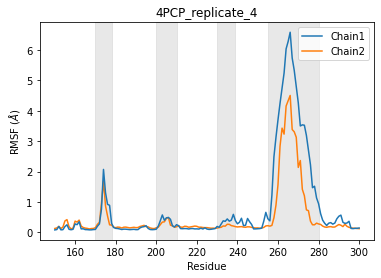

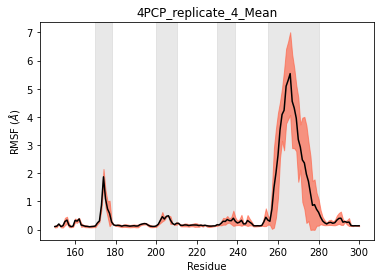

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

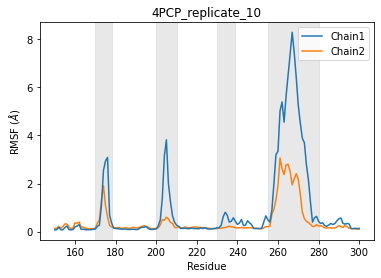

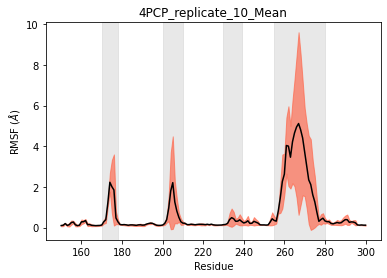

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

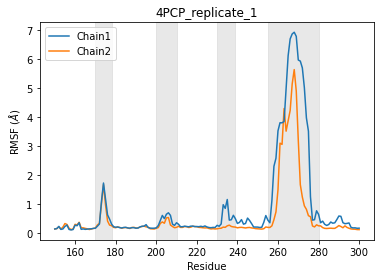

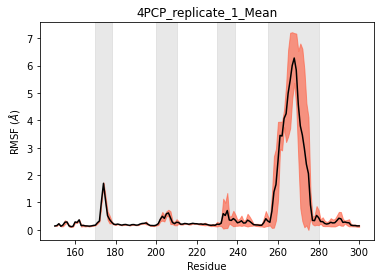

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

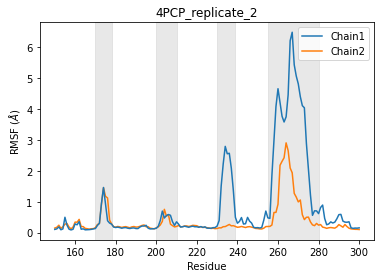

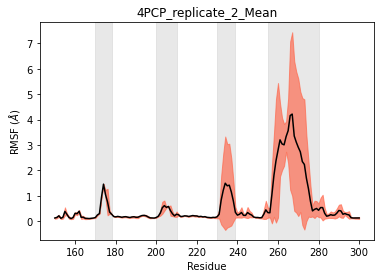

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

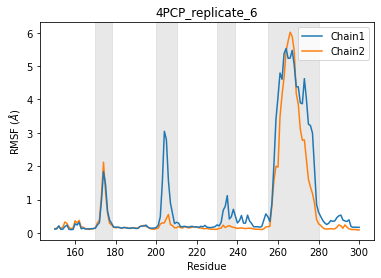

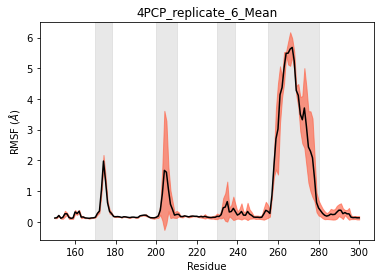

working on 4XAF
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAF/replicates
replicate_3
0.1864
0.1448
Ensemble size :  75

replicate_4
0.1869
0.1454
Ensemble size :  75

replicate_5
0.1917
0.1505
Ensemble size :  50

replicate_2
0.1842
0.1434
Ensemble size :  67

replicate_7
0.1867
0.1427
Ensemble size :  67

replicate_9
0.1925
0.1478
Ensemble size :  67

replicate_10
0.1866
0.1464
Ensemble size :  67

replicate_8
0.1900
0.1515
Ensemble size :  50

replicate_1
0.1943
0.1499
Ensemble size :  67

replicate_6
0.1851
0.1436
Ensemble size :  75

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAF/replicates
replicate_6
['replicate_2', 'replicate_6', 'replicate_3', 'replicate_10', 'replicate_7', 'replicate_4', 'replicate_8', 'replicate_5', 'replicate_9', 'replicate_1']
best 

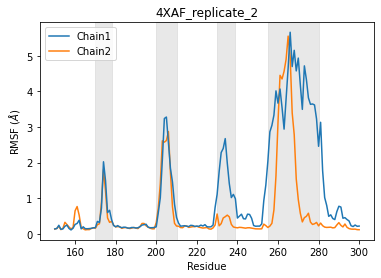

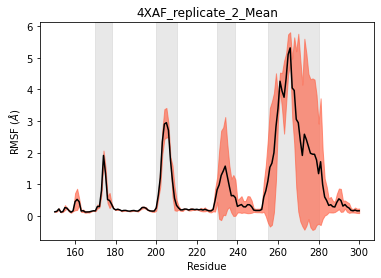

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

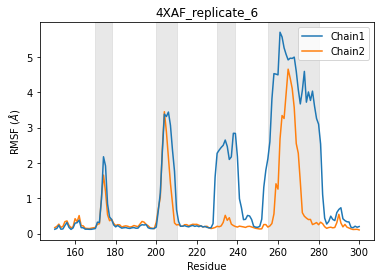

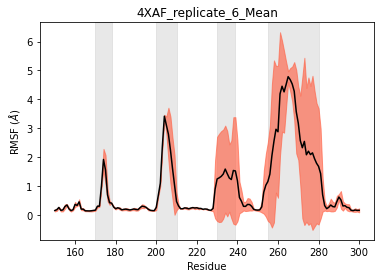

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

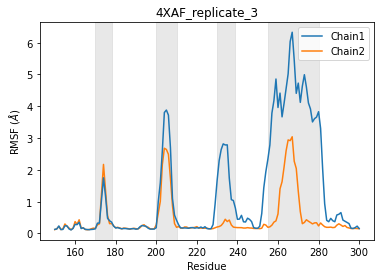

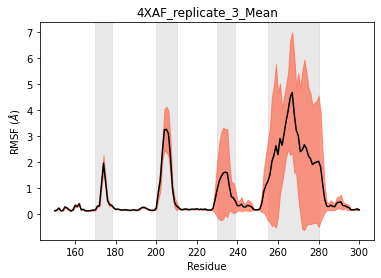

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

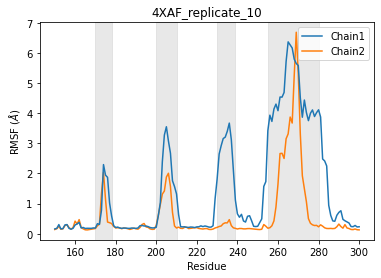

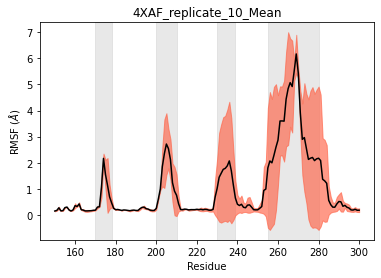

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

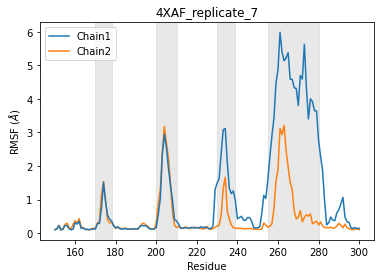

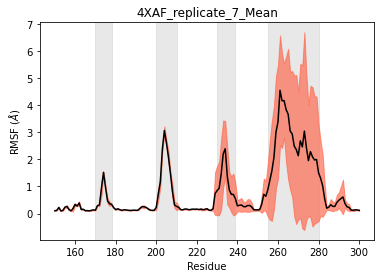

working on 4XD5
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XD5/replicates
replicate_3
0.1770
0.1329
Ensemble size :  50

replicate_4
0.1827
0.1389
Ensemble size :  38

replicate_5
0.1808
0.1329
Ensemble size :  60

replicate_2
0.1831
0.1396
Ensemble size :  43

replicate_7
0.1778
0.1333
Ensemble size :  43

replicate_9
0.1822
0.1397
Ensemble size :  38

replicate_10
0.1801
0.1357
Ensemble size :  43

replicate_8
0.1783
0.1340
Ensemble size :  50

replicate_1
0.1799
0.1335
Ensemble size :  43

replicate_6
0.1773
0.1318
Ensemble size :  50

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XD5/replicates
replicate_6
['replicate_3', 'replicate_6', 'replicate_7', 'replicate_8', 'replicate_1', 'replicate_10', 'replicate_5', 'replicate_9', 'replicate_4', 'replicate_2']
best 

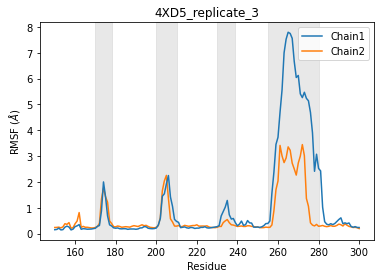

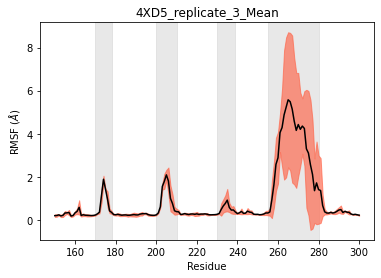

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

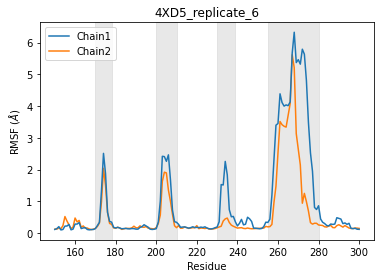

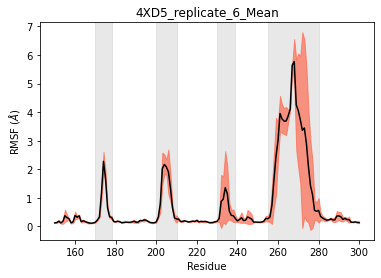

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

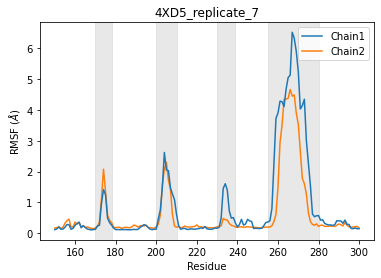

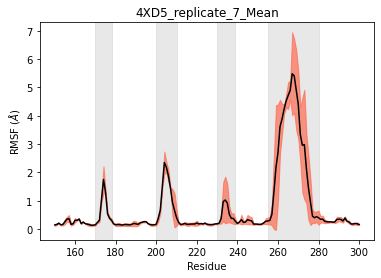

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

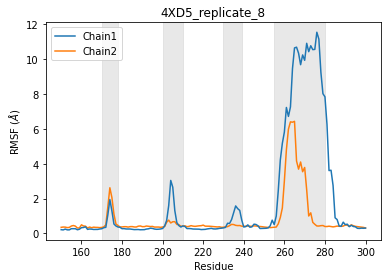

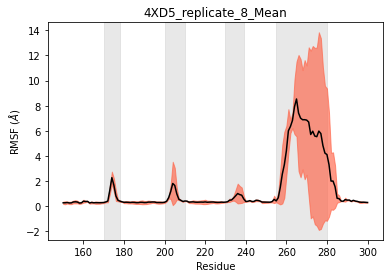

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

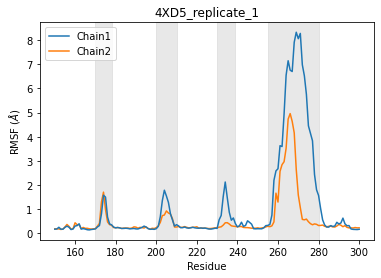

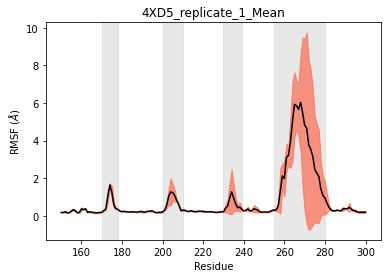

working on 4XAG
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAG/replicates
replicate_3
0.1784
0.1368
Ensemble size :  75

replicate_4
0.1728
0.1336
Ensemble size :  67

replicate_5
0.1717
0.1334
Ensemble size :  67

replicate_2
0.1758
0.1350
Ensemble size :  86

replicate_7
0.1749
0.1338
Ensemble size :  75

replicate_9
0.1744
0.1352
Ensemble size :  67

replicate_10
0.1695
0.1315
Ensemble size :  75

replicate_8
0.1723
0.1340
Ensemble size :  75

replicate_1
0.1758
0.1371
Ensemble size :  50

replicate_6
0.1710
0.1353
Ensemble size :  50

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAG/replicates
replicate_6
['replicate_10', 'replicate_6', 'replicate_5', 'replicate_8', 'replicate_4', 'replicate_9', 'replicate_7', 'replicate_2', 'replicate_1', 'replicate_3']
best 

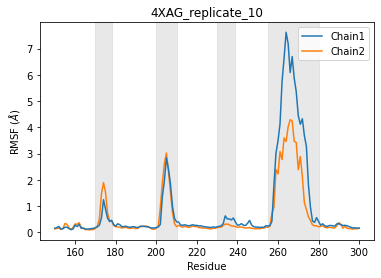

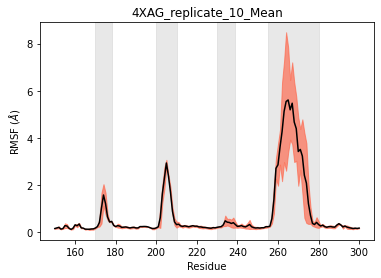

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

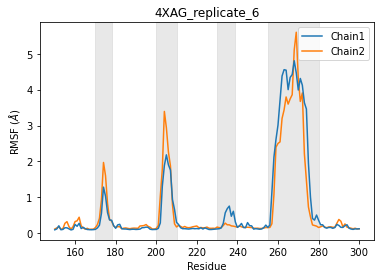

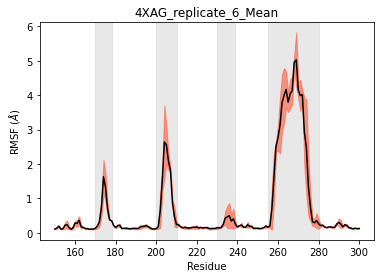

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

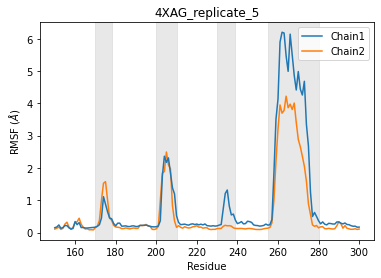

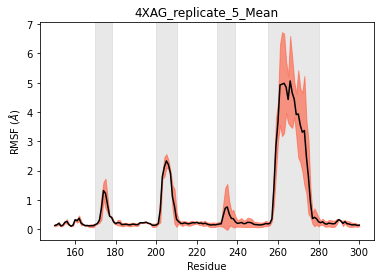

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

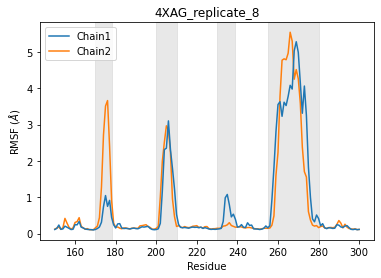

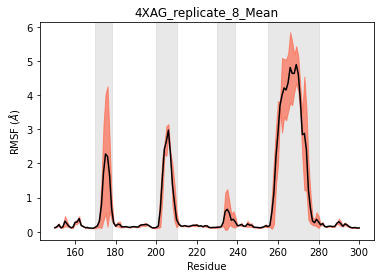

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

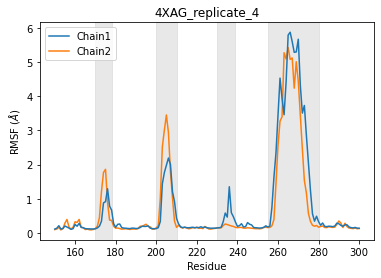

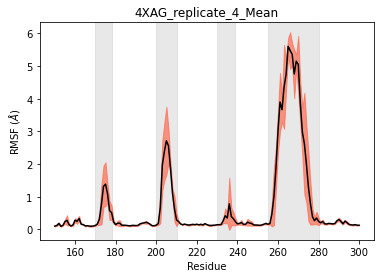

working on 4XAY
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAY/replicates
replicate_3
0.1843
0.1387
Ensemble size :  63

replicate_4
0.1866
0.1398
Ensemble size :  56

replicate_5
0.1812
0.1371
Ensemble size :  84

replicate_2
0.1825
0.1387
Ensemble size :  63

replicate_7
0.1835
0.1381
Ensemble size :  63

replicate_9
0.1838
0.1386
Ensemble size :  72

replicate_10
0.1892
0.1388
Ensemble size :  72

replicate_8
0.1841
0.1397
Ensemble size :  63

replicate_1
0.1836
0.1372
Ensemble size :  84

replicate_6
0.1882
0.1397
Ensemble size :  72

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAY/replicates
replicate_6
['replicate_5', 'replicate_2', 'replicate_7', 'replicate_1', 'replicate_9', 'replicate_8', 'replicate_3', 'replicate_4', 'replicate_6', 'replicate_10']
best 

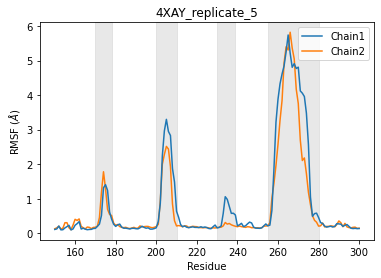

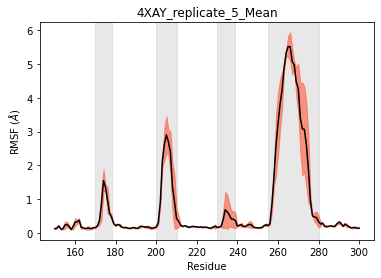

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

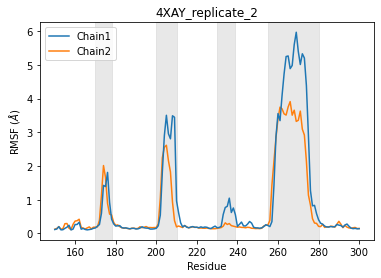

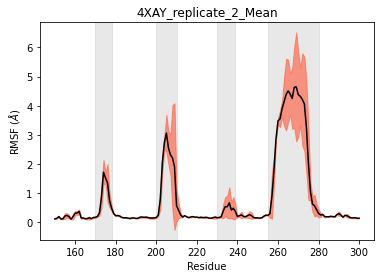

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

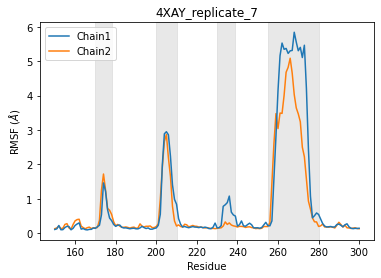

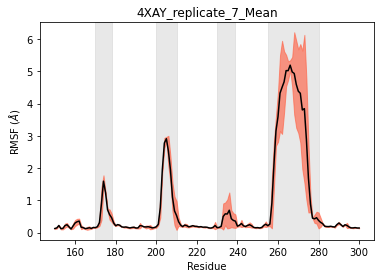

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

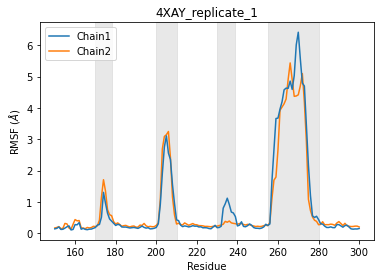

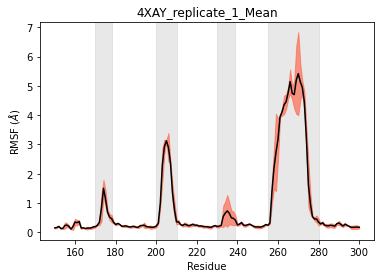

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

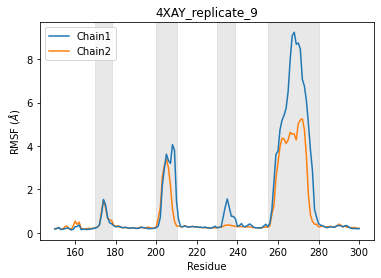

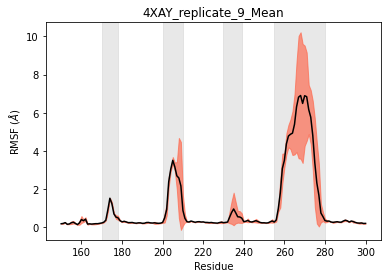

working on 4XAZ
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAZ/replicates
replicate_3
0.1620
0.1327
Ensemble size :  100

replicate_4
0.1629
0.1350
Ensemble size :  56

replicate_5
0.1685
0.1385
Ensemble size :  72

replicate_2
0.1633
0.1331
Ensemble size :  84

replicate_7
0.1648
0.1333
Ensemble size :  84

replicate_9
0.1732
0.1418
Ensemble size :  50

replicate_10
0.1639
0.1335
Ensemble size :  84

replicate_8
0.1646
0.1371
Ensemble size :  56

replicate_1
0.1696
0.1389
Ensemble size :  63

replicate_6
0.1643
0.1350
Ensemble size :  72

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAZ/replicates
replicate_6
['replicate_3', 'replicate_4', 'replicate_2', 'replicate_10', 'replicate_6', 'replicate_8', 'replicate_7', 'replicate_5', 'replicate_1', 'replicate_9']
best

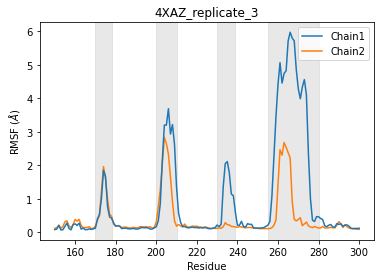

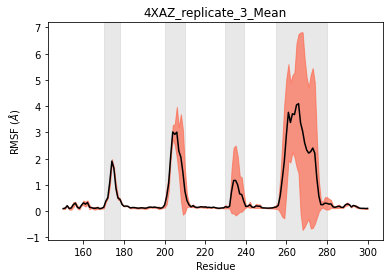

[36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0,

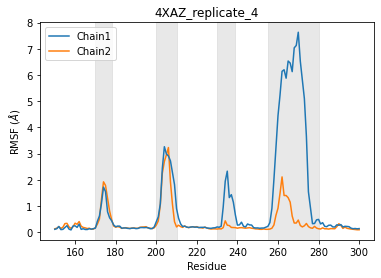

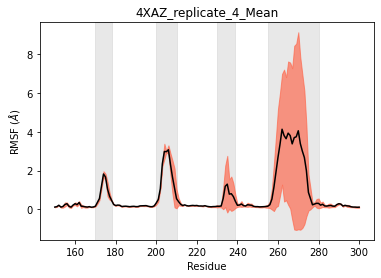

[36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0,

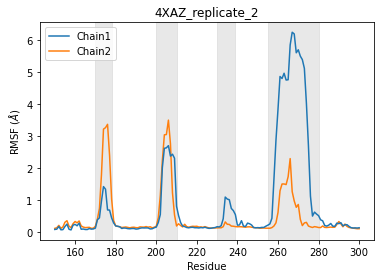

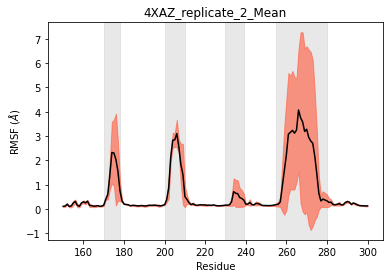

[36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0,

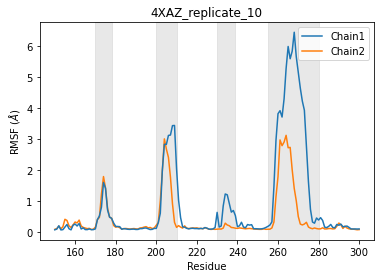

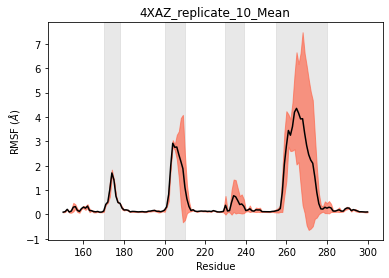

[36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0,

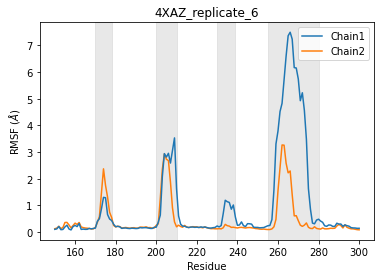

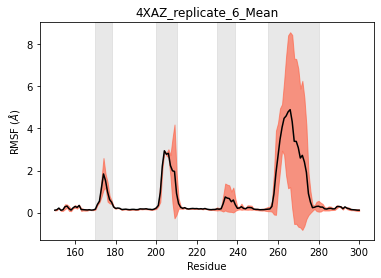

working on 4PCN
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCN/replicates
replicate_3
0.1675
0.1317
Ensemble size :  72

replicate_4
0.1678
0.1309
Ensemble size :  84

replicate_5
0.1681
0.1332
Ensemble size :  56

replicate_2
0.1670
0.1289
Ensemble size :  84

replicate_7
0.1648
0.1284
Ensemble size :  84

replicate_9
0.1634
0.1293
Ensemble size :  72

replicate_10
0.1644
0.1287
Ensemble size :  84

replicate_8
0.1651
0.1296
Ensemble size :  84

replicate_1
0.1655
0.1305
Ensemble size :  63

replicate_6
0.1667
0.1300
Ensemble size :  72

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCN/replicates
replicate_6
['replicate_9', 'replicate_10', 'replicate_7', 'replicate_8', 'replicate_1', 'replicate_6', 'replicate_2', 'replicate_3', 'replicate_4', 'replicate_5']
best 

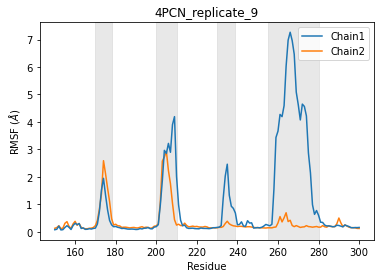

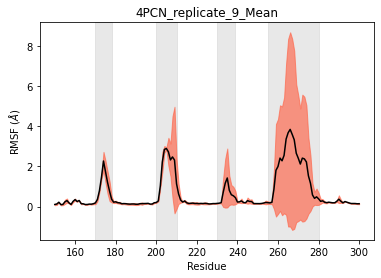

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

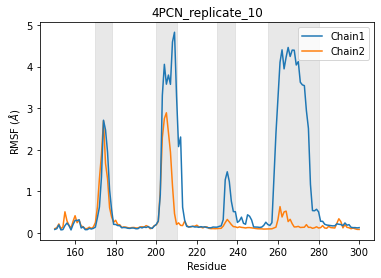

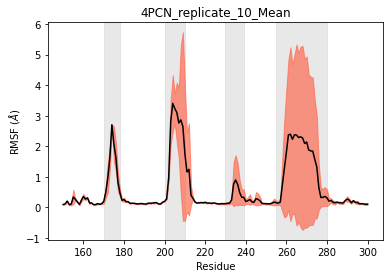

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

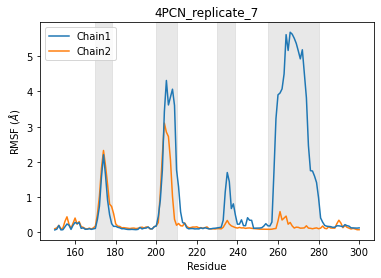

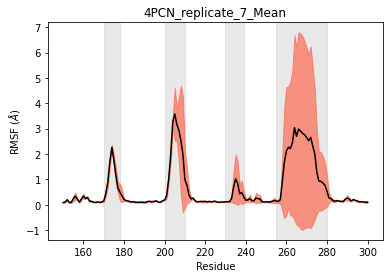

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

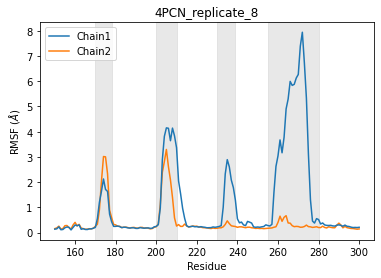

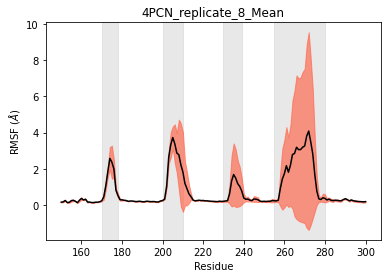

[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

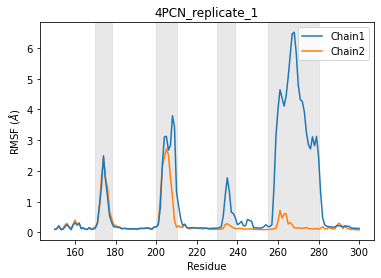

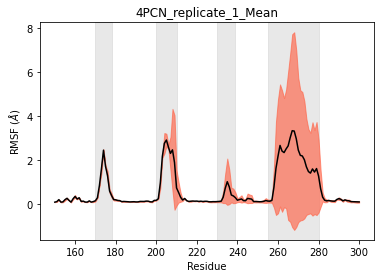

In [69]:
def analyseXVG_notav(xvgfile, elim=False):
    return np.array(aa.processrmsf_3(aa.processrmsf_2(aa.processrmsf_1(xvgfile)), eliminate=elim))

for pdb_id in Rtraj:
    print(f"working on {pdb_id}")
    d=f"{data_path}{pdb_id}"
    best_ones=find_min_Rfrees_names(d, 5)
    print(f"best for {pdb_id} are {best_ones}")
    if not os.path.isdir(f"{d}/best_replicates"):
        os.makedirs(f"{d}/best_replicates", exist_ok=True)
    # os.mkdirs(f"{d}/best_replicates", exist_ok=True)
    for rep in best_ones:
        filepath=f"{d}/replicates/{rep}/rmsf.xvg"
        datatest= analyseXVG_notav(filepath, elim=False)
        # average_data=aa.analyseXVG(filepath, elim=False)

        print("printing data")
        print(datatest)
        df = pd.DataFrame(datatest, columns=["Residue", "Chain1", "Chain2"])
        df[['Chain1', 'Chain2']] = df[['Chain1', 'Chain2']].apply(pd.to_numeric, errors='coerce')

        # Calculate the mean for each residue position (ignoring NaN values)
        df['Mean'] = df[['Chain1', 'Chain2']].mean(axis=1)

        # Calculate the standard deviation for each residue position (ignoring NaN values)
        df['STD'] = df[['Chain1', 'Chain2']].std(axis=1)
        df
        # Calculate the mean for each residue position
       # DF['Mean'] = df[["Chain1", "Chain2"]].mean(axis=1)
        # Calculate the standard deviation for each residue position
        #DF['STD'] = df[['Chain1', 'Chain2']].std(axis=1)
        df.to_csv(f"{d}/best_replicates/{pdb_id}_{rep}_reordered_rmsf.csv", index=False)
        # aDF = pd.DataFrame(average_dataset)
        # aDF.to_csv(f"{d}/{rep}/reordered_rmsf_average.csv")


        # Filter the DataFrame for residues between 150 and 300
        filtered_df = df[(df['Residue'] >= 150) & (df['Residue'] <= 300)]

        # First plot: Chain1*10 and Chain2*10 vs Residue number
        plt.axvspan(200, 210, alpha=0.5, color='lightgrey', zorder=1)
        plt.axvspan(170, 178, alpha=0.5, color='lightgray', zorder=1)
        plt.axvspan(230, 239, alpha=0.5, color='lightgray', zorder=1)
        plt.axvspan(255, 280, alpha=0.5, color='lightgray', zorder=1)
        plt.plot(filtered_df['Residue'], filtered_df['Chain1']*10, label='Chain1', zorder=4)
        plt.plot(filtered_df['Residue'], filtered_df['Chain2']*10, label='Chain2', zorder=3)
        plt.xlabel('Residue')
        plt.ylabel('RMSF ($\AA$)')
        plt.title(f"{pdb_id}_{rep}")
        plt.legend()
        plt.savefig(f"{d}/best_replicates/{pdb_id}{rep}.png")  
        plt.show()
        

        # Second plot: Mean*10 with shaded standard deviation
        plt.axvspan(200, 210, alpha=0.5, color='lightgrey', zorder=1)
        plt.axvspan(170, 178, alpha=0.5, color='lightgray', zorder=1)
        plt.axvspan(230, 239, alpha=0.5, color='lightgray', zorder=1)
        plt.axvspan(255, 280, alpha=0.5, color='lightgray', zorder=1)
        plt.plot(filtered_df['Residue'], filtered_df['Mean']*10, label='Mean*10', color="k", zorder=5)
        plt.fill_between(filtered_df['Residue'], (filtered_df['Mean'] - filtered_df['STD'])*10, (filtered_df['Mean'] + filtered_df['STD'])*10, color='tomato', alpha=0.65, zorder=2)
        plt.xlabel('Residue')
        plt.ylabel('RMSF ($\AA$)')
        plt.title(f"{pdb_id}_{rep}_Mean")
        # plt.legend()
        plt.savefig(f"{d}/best_replicates/{rep}_mean.png")
        plt.show()


# Compare chain 1 and 2

In [74]:
four_chains=['/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/SERTRAJ/5wms']
del_loop=['/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/SERTRAJ/5wcr']

place is 331
1
working on 4PCP
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates
replicate_3
0.1741
0.1344
Ensemble size :  56

replicate_4
0.1695
0.1302
Ensemble size :  84

replicate_5
0.1751
0.1331
Ensemble size :  84

replicate_2
0.1732
0.1324
Ensemble size :  72

replicate_7
0.1765
0.1337
Ensemble size :  84

replicate_9
0.1755
0.1329
Ensemble size :  63

replicate_10
0.1695
0.1294
Ensemble size :  84

replicate_8
0.1743
0.1335
Ensemble size :  72

replicate_1
0.1706
0.1300
Ensemble size :  84

replicate_6
0.1736
0.1343
Ensemble size :  56

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates
replicate_6
['replicate_4', 'replicate_10', 'replicate_1', 'replicate_2', 'replicate_6', 'replicate_3', 'replicate_8', 'replicate_5', 'replicate_9', 'repl

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


place is 332
2
working on 4XAF
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAF/replicates
replicate_3
0.1864
0.1448
Ensemble size :  75

replicate_4
0.1869
0.1454
Ensemble size :  75

replicate_5
0.1917
0.1505
Ensemble size :  50

replicate_2
0.1842
0.1434
Ensemble size :  67

replicate_7
0.1867
0.1427
Ensemble size :  67

replicate_9
0.1925
0.1478
Ensemble size :  67

replicate_10
0.1866
0.1464
Ensemble size :  67

replicate_8
0.1900
0.1515
Ensemble size :  50

replicate_1
0.1943
0.1499
Ensemble size :  67

replicate_6
0.1851
0.1436
Ensemble size :  75

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAF/replicates
replicate_6
['replicate_2', 'replicate_6', 'replicate_3', 'replicate_10', 'replicate_7', 'replicate_4', 'replicate_8', 'replicate_5', 'replicate_9', 'repl

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figB = plt.figure(figsize=(15,6))
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


place is 333
3
working on 4XD5
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XD5/replicates
replicate_3
0.1770
0.1329
Ensemble size :  50

replicate_4
0.1827
0.1389
Ensemble size :  38

replicate_5
0.1808
0.1329
Ensemble size :  60

replicate_2
0.1831
0.1396
Ensemble size :  43

replicate_7
0.1778
0.1333
Ensemble size :  43

replicate_9
0.1822
0.1397
Ensemble size :  38

replicate_10
0.1801
0.1357
Ensemble size :  43

replicate_8
0.1783
0.1340
Ensemble size :  50

replicate_1
0.1799
0.1335
Ensemble size :  43

replicate_6
0.1773
0.1318
Ensemble size :  50

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XD5/replicates
replicate_6
['replicate_3', 'replicate_6', 'replicate_7', 'replicate_8', 'replicate_1', 'replicate_10', 'replicate_5', 'replicate_9', 'replicate_4', 'repl

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


[215.0, 0.0226, 0.025]
[216.0, 0.0214, 0.0227]
[217.0, 0.023, 0.0237]
[218.0, 0.0251, 0.0252]
[219.0, 0.0228, 0.0254]
[220.0, 0.0216, 0.0272]
[221.0, 0.0212, 0.0214]
[222.0, 0.0224, 0.0218]
[223.0, 0.0209, 0.022]
[224.0, 0.0219, 0.0218]
[225.0, 0.0198, 0.0209]
[226.0, 0.0178, 0.0198]
[227.0, 0.0177, 0.0201]
[228.0, 0.0191, 0.0214]
[229.0, 0.0212, 0.0227]
[230.0, 0.0206, 0.0229]
[231.0, 0.0561, 0.0256]
[232.0, 0.0741, 0.0271]
[233.0, 0.1517, 0.034]
[234.0, 0.2124, 0.0437]
[235.0, 0.1478, 0.0441]
[236.0, 0.087, 0.0385]
[237.0, 0.0543, 0.0312]
[238.0, 0.0637, 0.0295]
[239.0, 0.0403, 0.0286]
[240.0, 0.0268, 0.0271]
[241.0, 0.0314, 0.0282]
[242.0, 0.046, 0.0283]
[243.0, 0.0288, 0.0244]
[244.0, 0.0326, 0.0238]
[245.0, 0.0519, 0.0237]
[246.0, 0.0454, 0.0227]
[247.0, 0.0379, 0.0212]
[248.0, 0.0192, 0.0218]
[249.0, 0.0187, 0.0212]
[250.0, 0.0192, 0.0227]
[251.0, 0.0192, 0.0209]
[252.0, 0.0188, 0.0223]
[253.0, 0.0229, 0.0236]
[254.0, 0.0319, 0.0268]
[255.0, 0.0329, 0.0293]
[256.0, 0.037, 0.0277]

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


place is 334
4
working on 4XAG
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAG/replicates
replicate_3
0.1784
0.1368
Ensemble size :  75

replicate_4
0.1728
0.1336
Ensemble size :  67

replicate_5
0.1717
0.1334
Ensemble size :  67

replicate_2
0.1758
0.1350
Ensemble size :  86

replicate_7
0.1749
0.1338
Ensemble size :  75

replicate_9
0.1744
0.1352
Ensemble size :  67

replicate_10
0.1695
0.1315
Ensemble size :  75

replicate_8
0.1723
0.1340
Ensemble size :  75

replicate_1
0.1758
0.1371
Ensemble size :  50

replicate_6
0.1710
0.1353
Ensemble size :  50

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAG/replicates
replicate_6
['replicate_10', 'replicate_6', 'replicate_5', 'replicate_8', 'replicate_4', 'replicate_9', 'replicate_7', 'replicate_2', 'replicate_1', 'repl

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


[91.0, 0.0146, 0.018]
[92.0, 0.0147, 0.0201]
[93.0, 0.0181, 0.0166]
[94.0, 0.0171, 0.0154]
[95.0, 0.0142, 0.0138]
[96.0, 0.0163, 0.0142]
[97.0, 0.0123, 0.0114]
[98.0, 0.0124, 0.0105]
[99.0, 0.013, 0.0083]
[100.0, 0.0119, 0.0075]
[101.0, 0.0132, 0.0071]
[102.0, 0.012, 0.0071]
[103.0, 0.0118, 0.0069]
[104.0, 0.0103, 0.0073]
[105.0, 0.0111, 0.0086]
[106.0, 0.0111, 0.0083]
[107.0, 0.0096, 0.0077]
[108.0, 0.009, 0.0071]
[109.0, 0.0105, 0.01]
[110.0, 0.0165, 0.0151]
[111.0, 0.0171, 0.0209]
[112.0, 0.0098, 0.0141]
[113.0, 0.0086, 0.0102]
[114.0, 0.0107, 0.0125]
[115.0, 0.018, 0.0141]
[116.0, 0.0156, 0.0193]
[117.0, 0.01, 0.0124]
[118.0, 0.0225, 0.0135]
[119.0, 0.0194, 0.015]
[120.0, 0.0146, 0.0147]
[121.0, 0.0227, 0.015]
[122.0, 0.011, 0.0132]
[123.0, 0.0105, 0.0115]
[124.0, 0.0107, 0.01]
[125.0, 0.0116, 0.0098]
[126.0, 0.011, 0.0094]
[127.0, 0.0121, 0.0072]
[128.0, 0.0132, 0.0075]
[129.0, 0.0147, 0.0089]
[130.0, 0.0146, 0.0094]
[131.0, 0.0158, 0.0098]
[132.0, 0.0159, 0.013]
[133.0, 0.0137, 0

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()



REPTITLE ISSSSSS rep_5


/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


place is 335
5
working on 4XAY
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAY/replicates
replicate_3
0.1843
0.1387
Ensemble size :  63

replicate_4
0.1866
0.1398
Ensemble size :  56

replicate_5
0.1812
0.1371
Ensemble size :  84

replicate_2
0.1825
0.1387
Ensemble size :  63

replicate_7
0.1835
0.1381
Ensemble size :  63

replicate_9
0.1838
0.1386
Ensemble size :  72

replicate_10
0.1892
0.1388
Ensemble size :  72

replicate_8
0.1841
0.1397
Ensemble size :  63

replicate_1
0.1836
0.1372
Ensemble size :  84

replicate_6
0.1882
0.1397
Ensemble size :  72

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAY/replicates
replicate_6
['replicate_5', 'replicate_2', 'replicate_7', 'replicate_1', 'replicate_9', 'replicate_8', 'replicate_3', 'replicate_4', 'replicate_6', 'repli

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


6
working on 4XAZ
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAZ/replicates
replicate_3
0.1620
0.1327
Ensemble size :  100

replicate_4
0.1629
0.1350
Ensemble size :  56

replicate_5
0.1685
0.1385
Ensemble size :  72

replicate_2
0.1633
0.1331
Ensemble size :  84

replicate_7
0.1648
0.1333
Ensemble size :  84

replicate_9
0.1732
0.1418
Ensemble size :  50

replicate_10
0.1639
0.1335
Ensemble size :  84

replicate_8
0.1646
0.1371
Ensemble size :  56

replicate_1
0.1696
0.1389
Ensemble size :  63

replicate_6
0.1643
0.1350
Ensemble size :  72

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4XAZ/replicates
replicate_6
['replicate_3', 'replicate_4', 'replicate_2', 'replicate_10', 'replicate_6', 'replicate_8', 'replicate_7', 'replicate_5', 'replicate_1', 'replicate_9']
be

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()


[36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0,

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()



REPTITLE ISSSSSS rep_3
[36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()


[36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0,

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


7
working on 4PCN
/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCN/replicates
replicate_3
0.1675
0.1317
Ensemble size :  72

replicate_4
0.1678
0.1309
Ensemble size :  84

replicate_5
0.1681
0.1332
Ensemble size :  56

replicate_2
0.1670
0.1289
Ensemble size :  84

replicate_7
0.1648
0.1284
Ensemble size :  84

replicate_9
0.1634
0.1293
Ensemble size :  72

replicate_10
0.1644
0.1287
Ensemble size :  84

replicate_8
0.1651
0.1296
Ensemble size :  84

replicate_1
0.1655
0.1305
Ensemble size :  63

replicate_6
0.1667
0.1300
Ensemble size :  72

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCN/replicates
replicate_6
['replicate_9', 'replicate_10', 'replicate_7', 'replicate_8', 'replicate_1', 'replicate_6', 'replicate_2', 'replicate_3', 'replicate_4', 'replicate_5']
bes

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figA.show()


[34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 1

/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figB.show()
/var/folders/4n/4433n5s52nb5jmvl26fpws3wkmhhcf/T/ipykernel_10590/2809149305.py:267: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figchains.show()


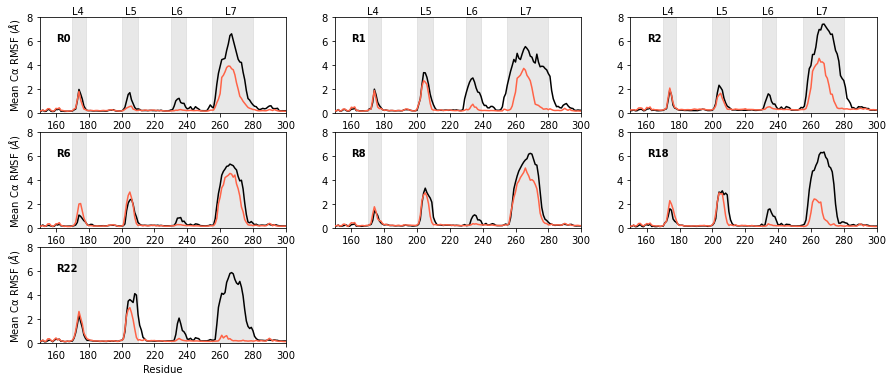

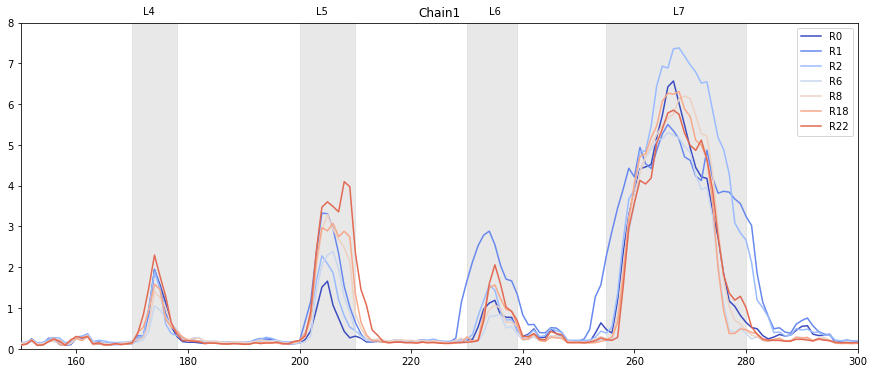

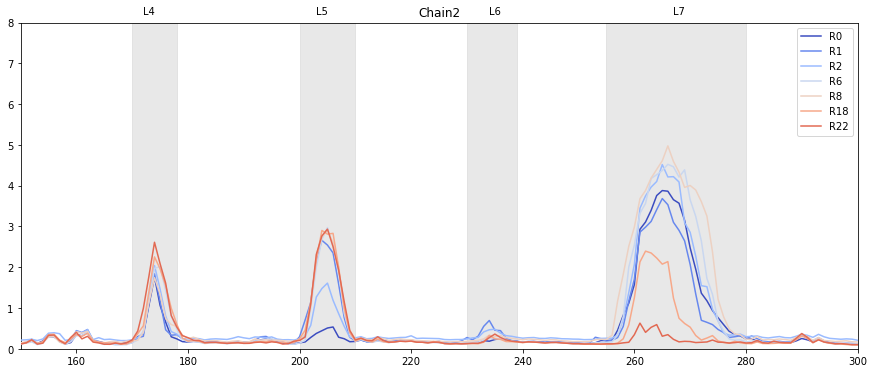

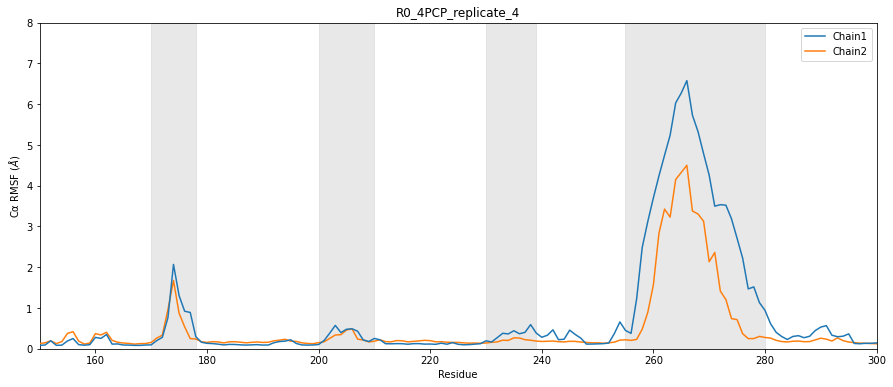

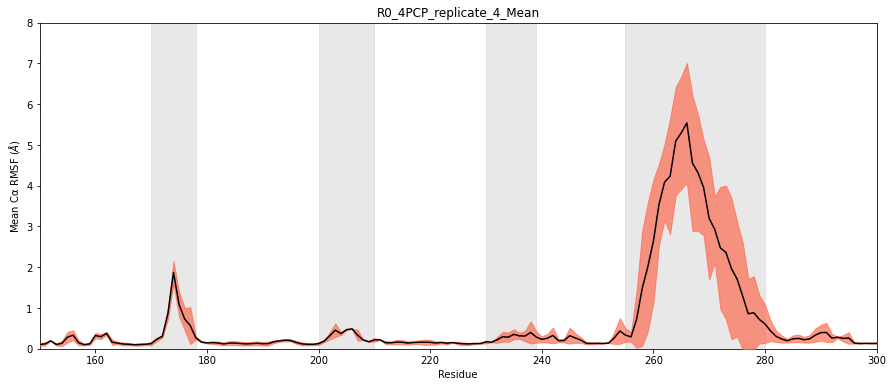

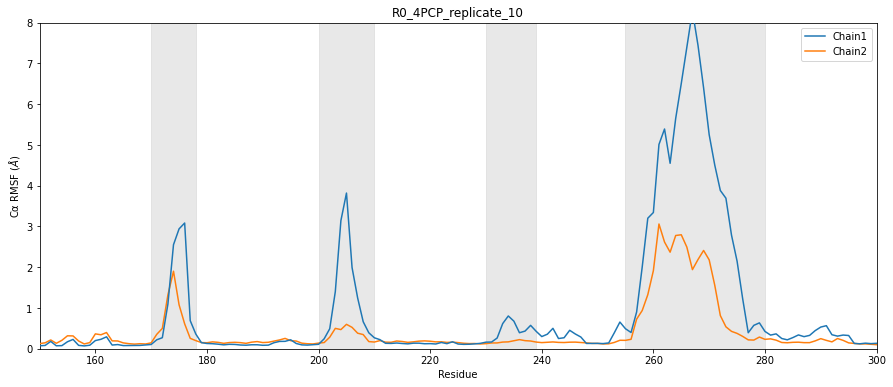

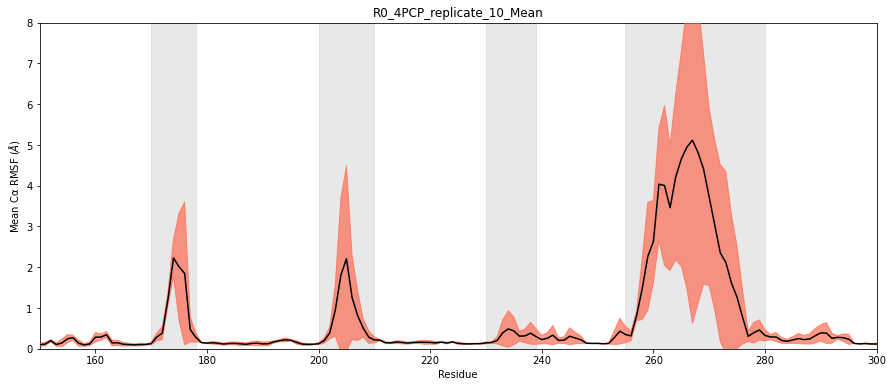

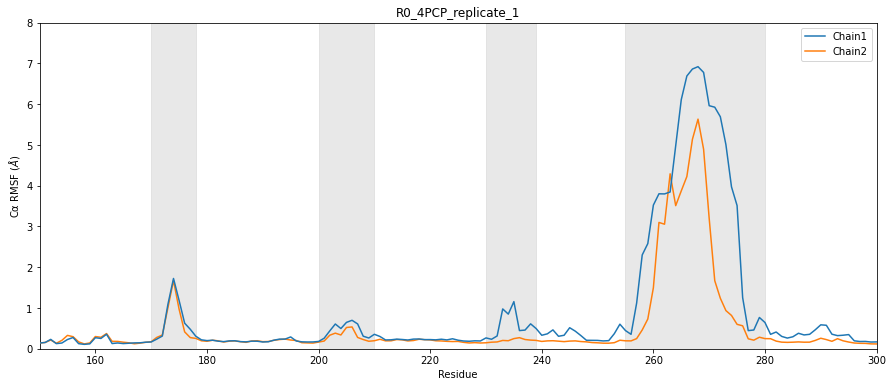

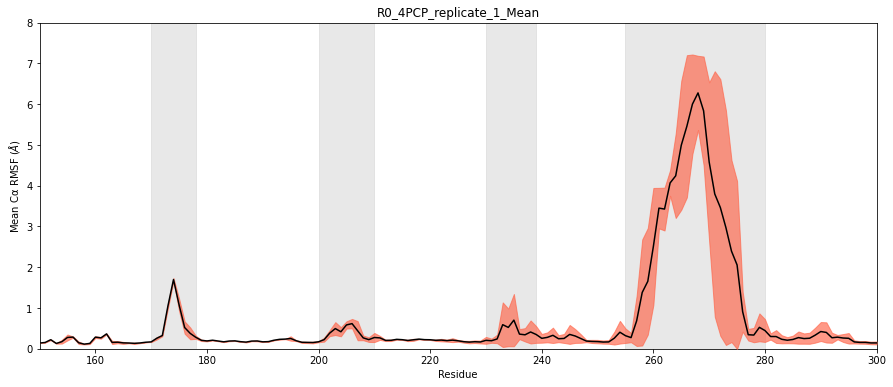

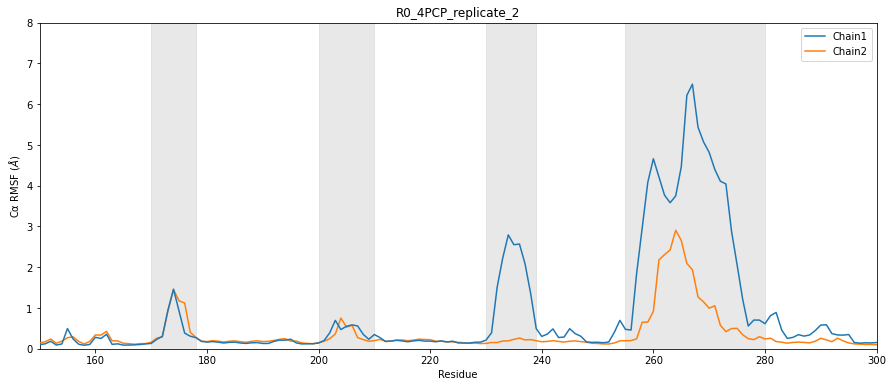

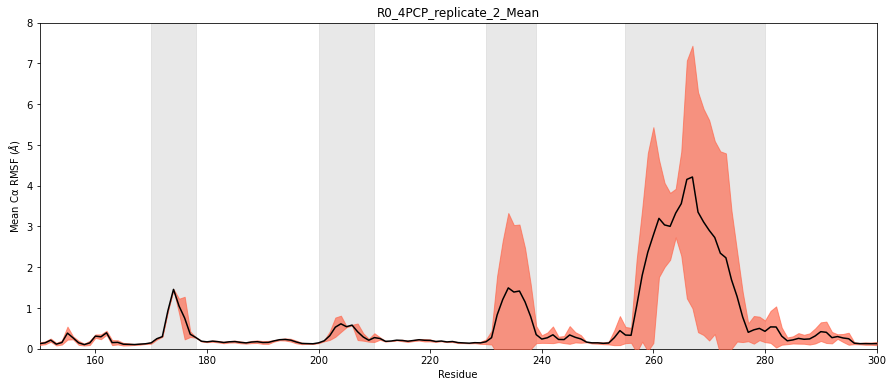

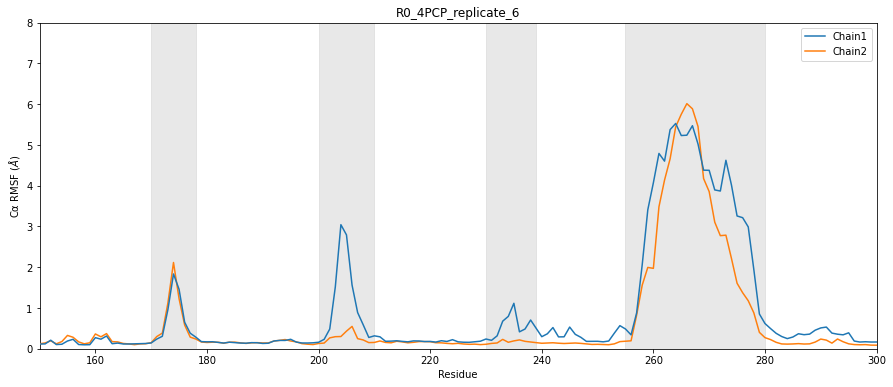

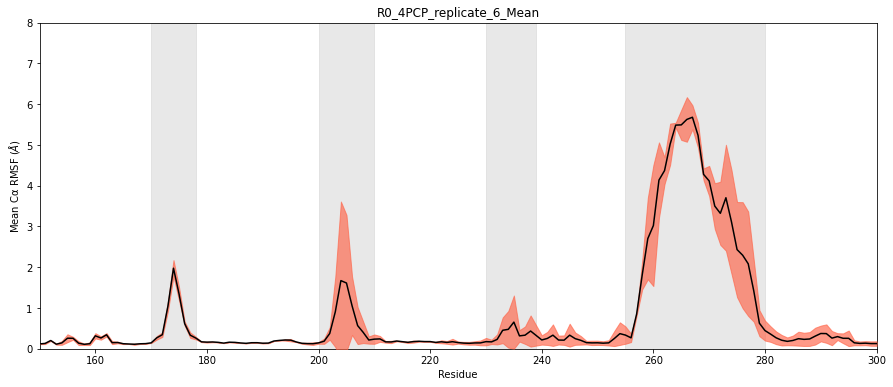

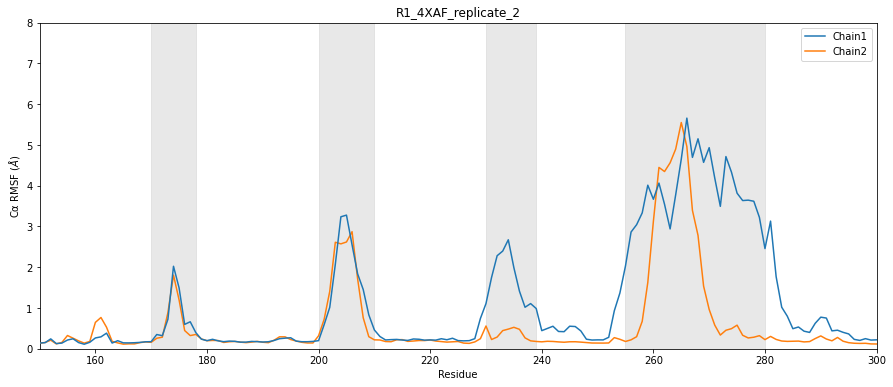

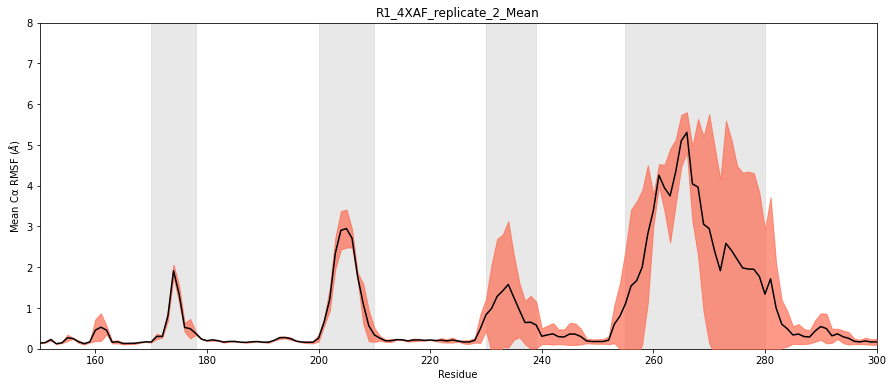

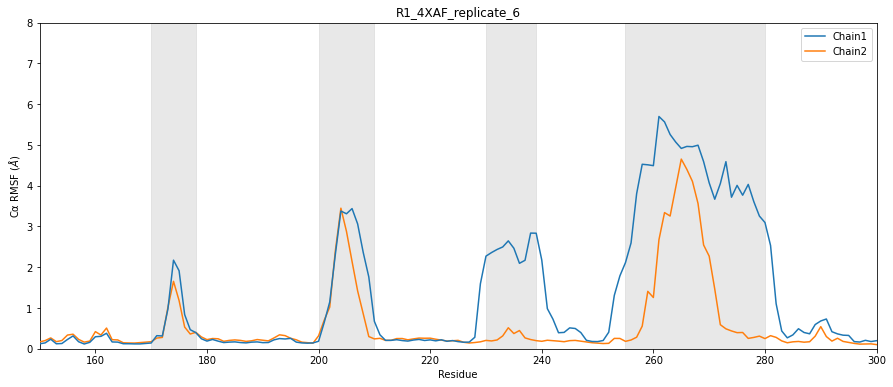

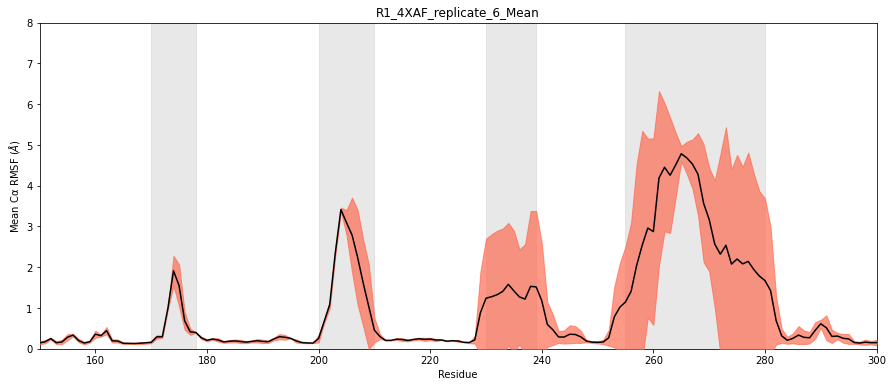

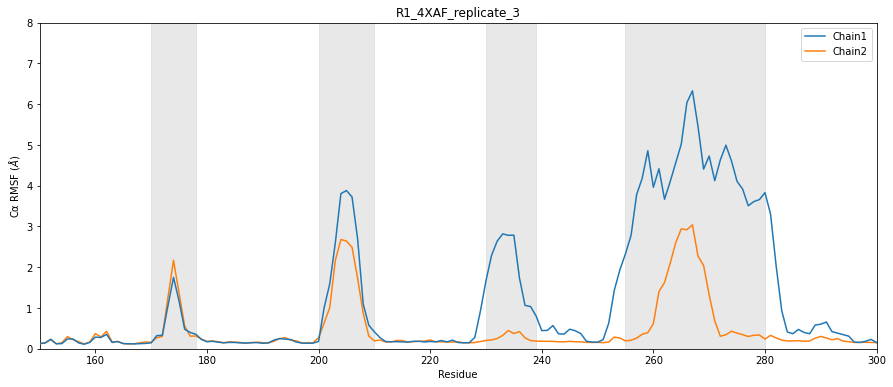

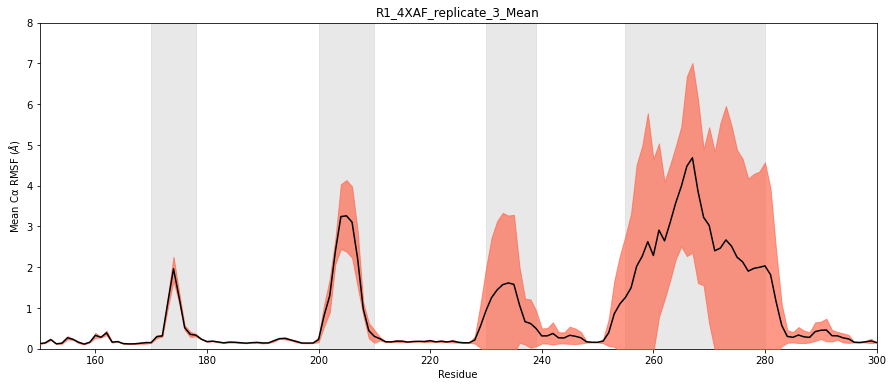

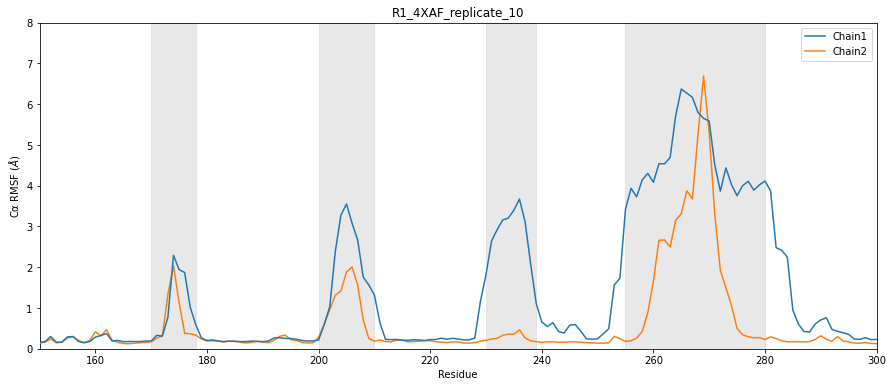

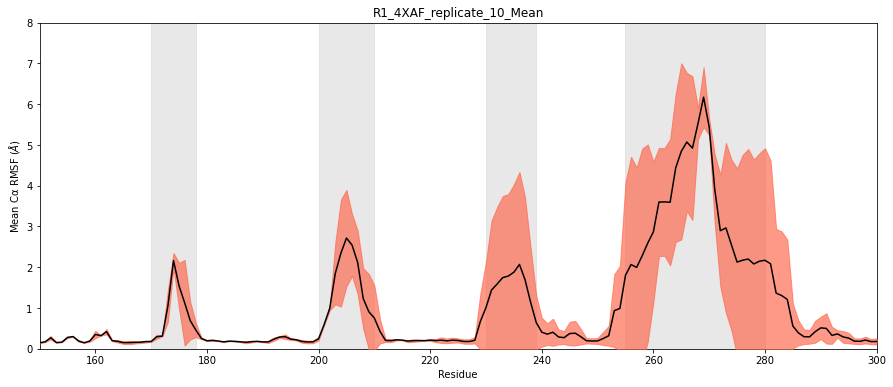

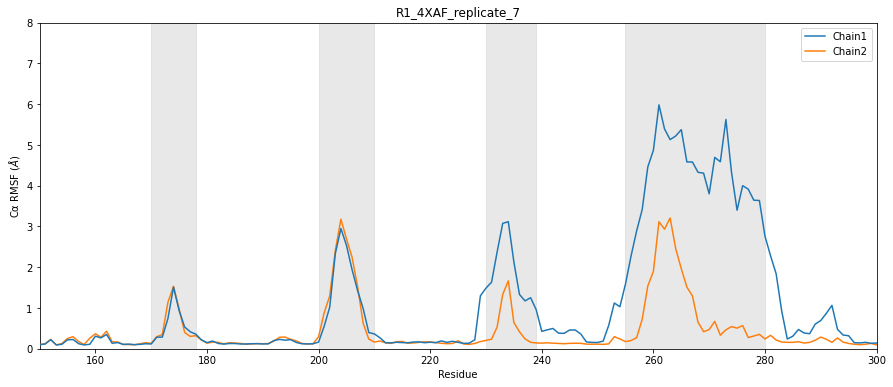

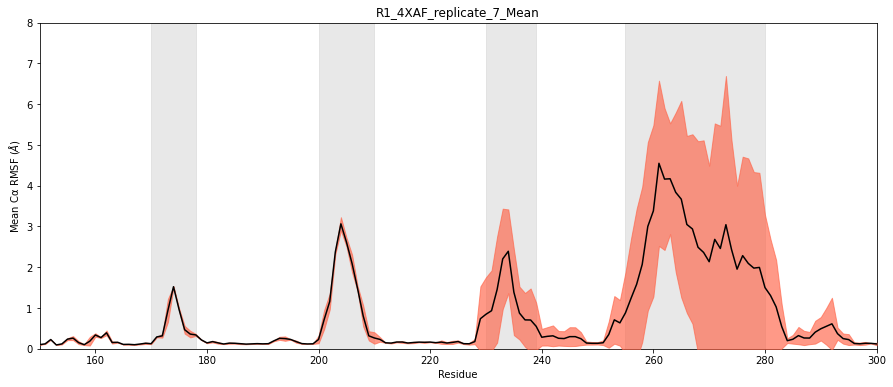

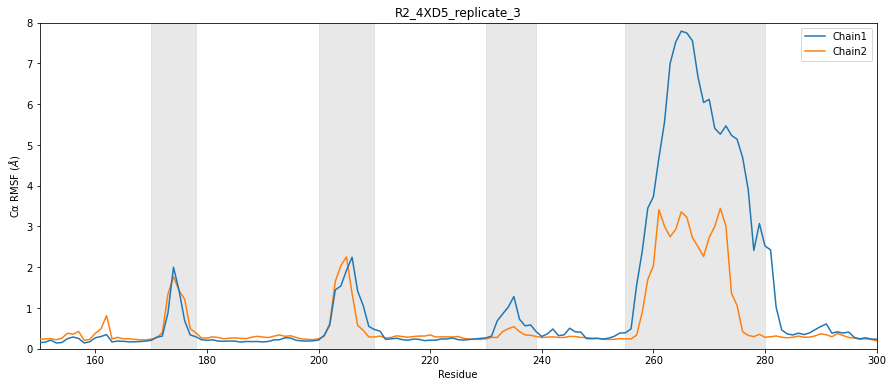

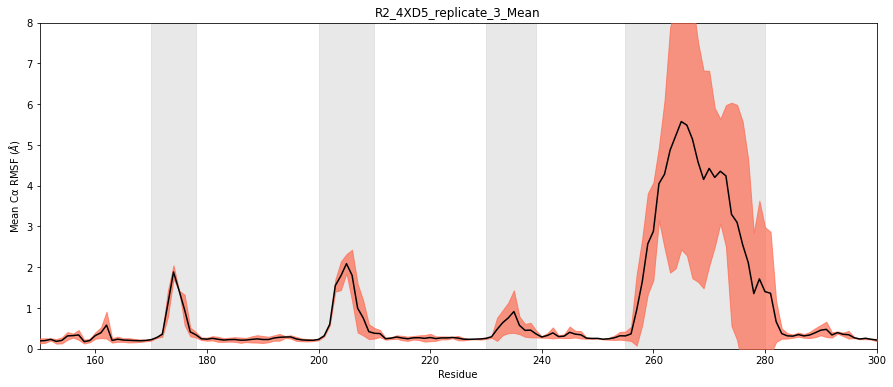

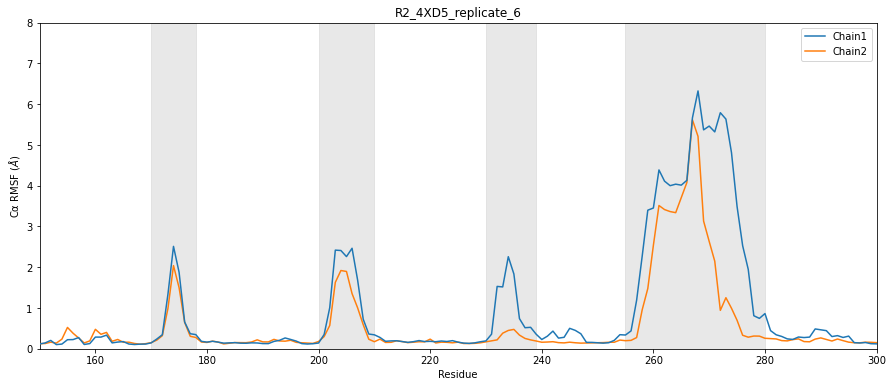

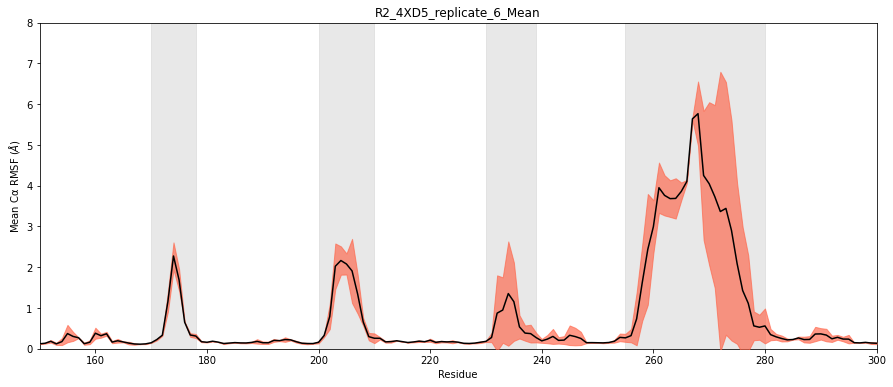

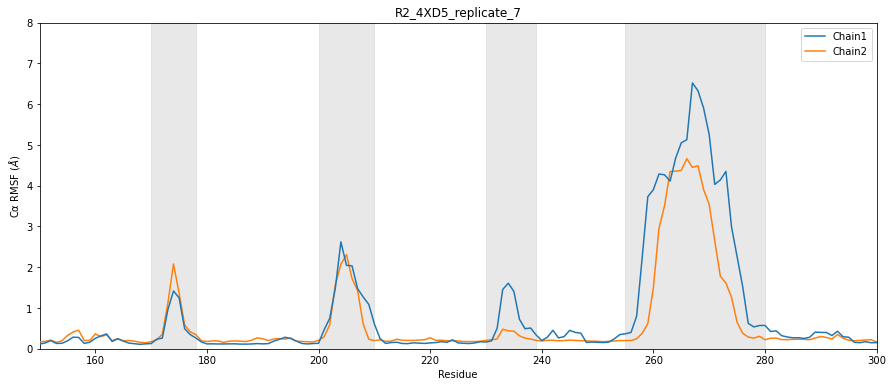

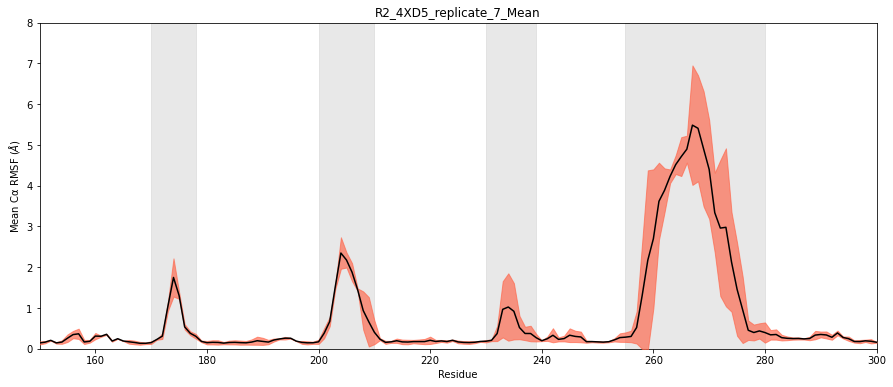

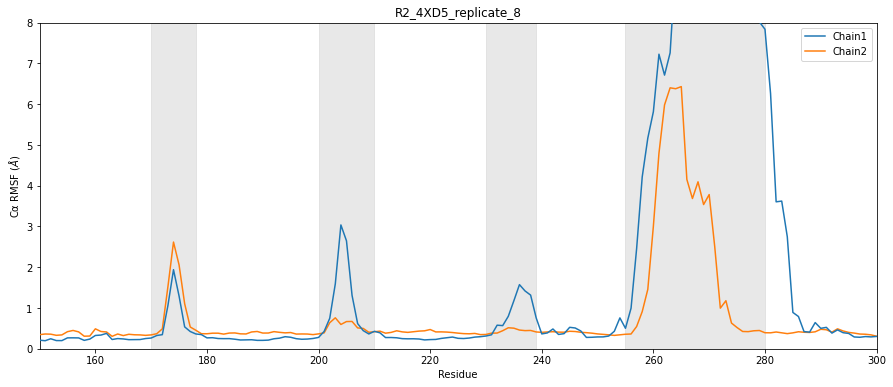

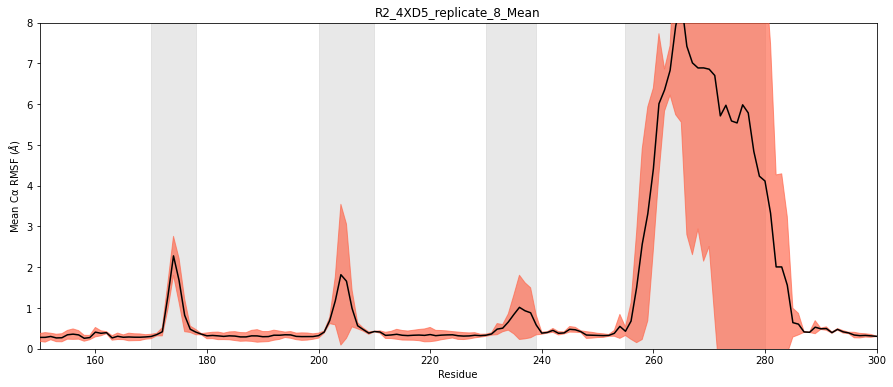

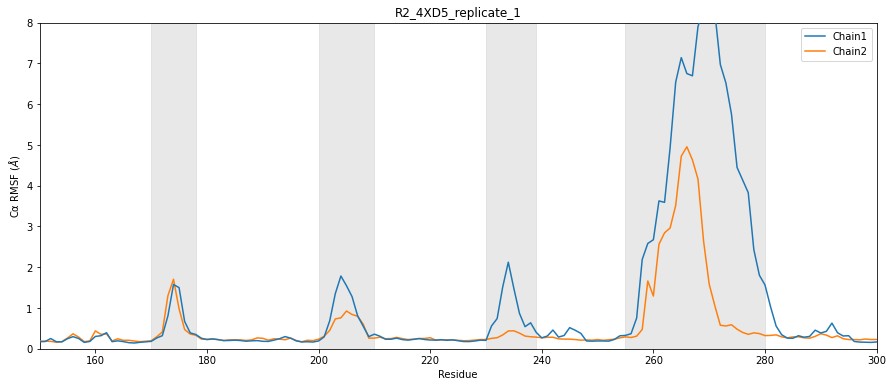

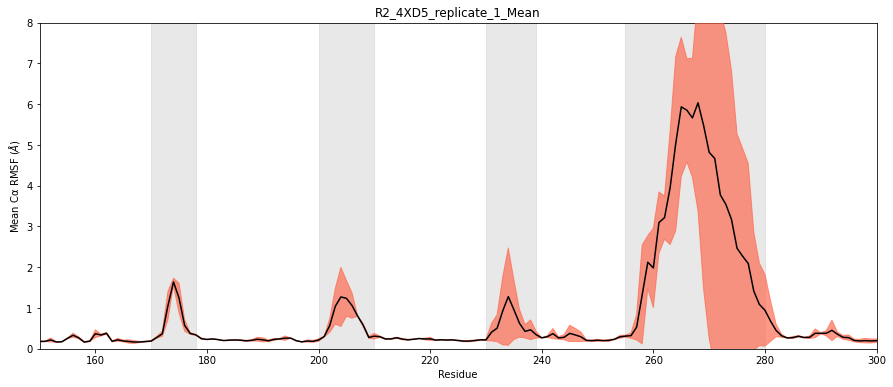

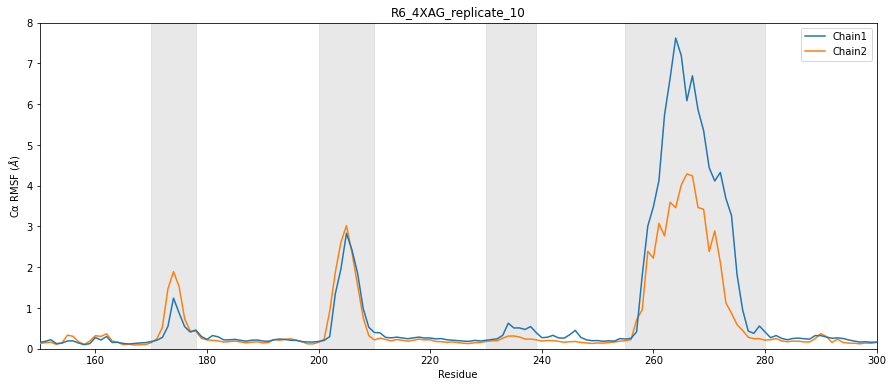

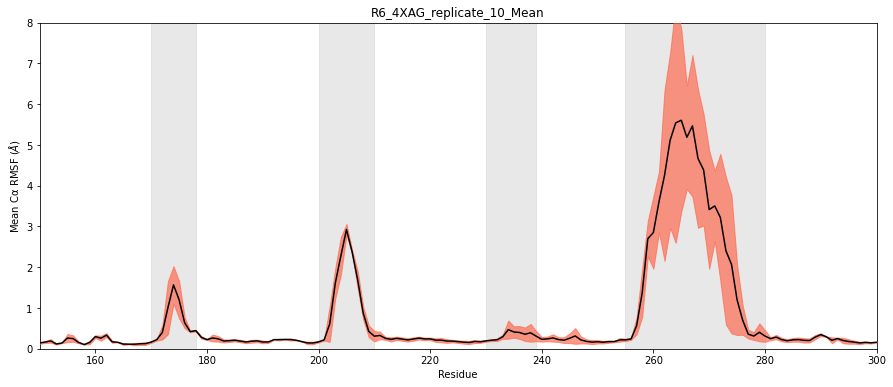

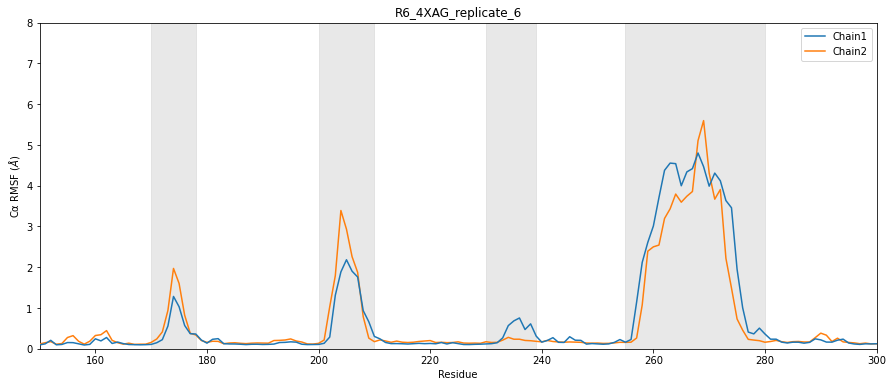

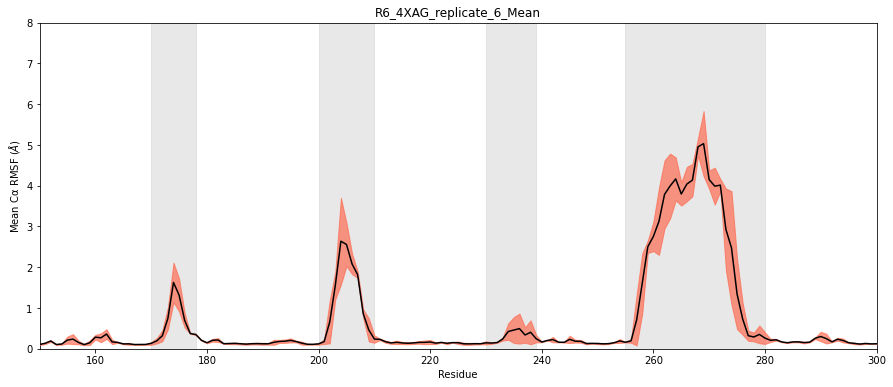

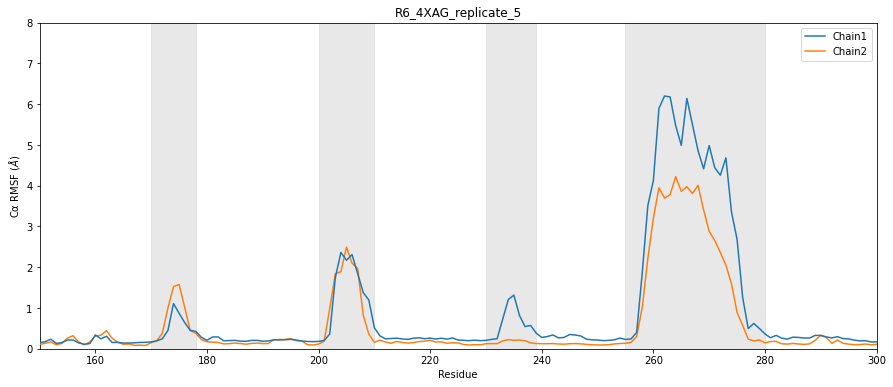

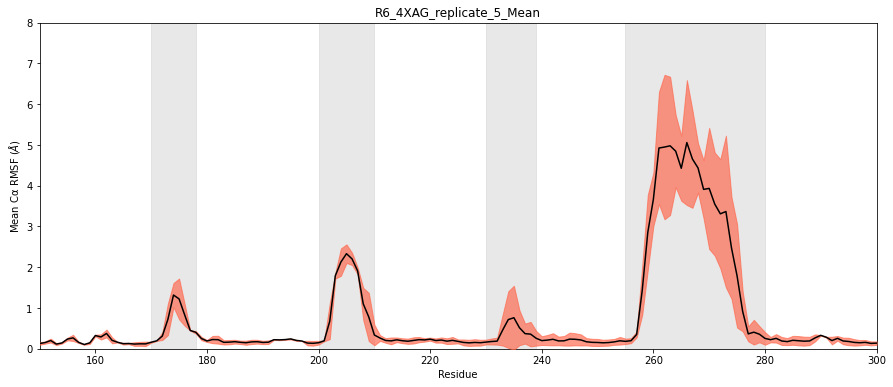

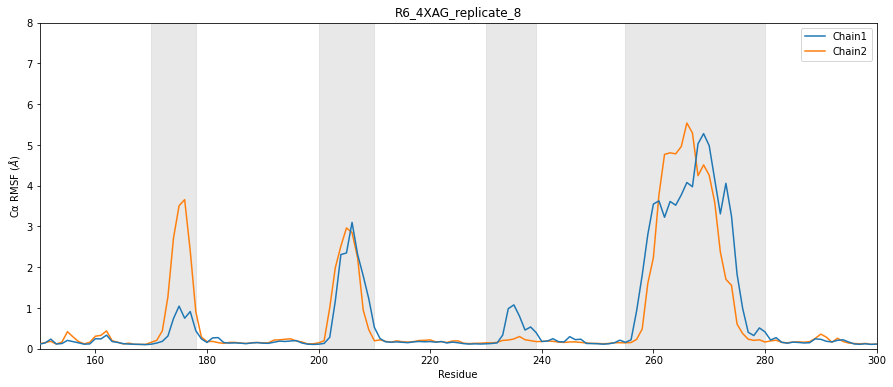

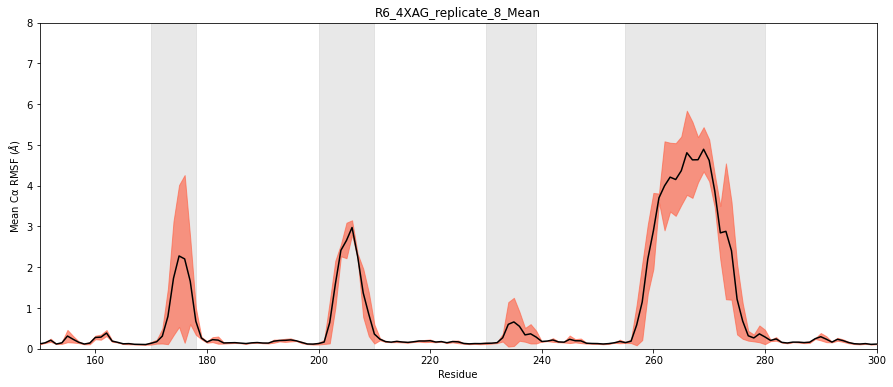

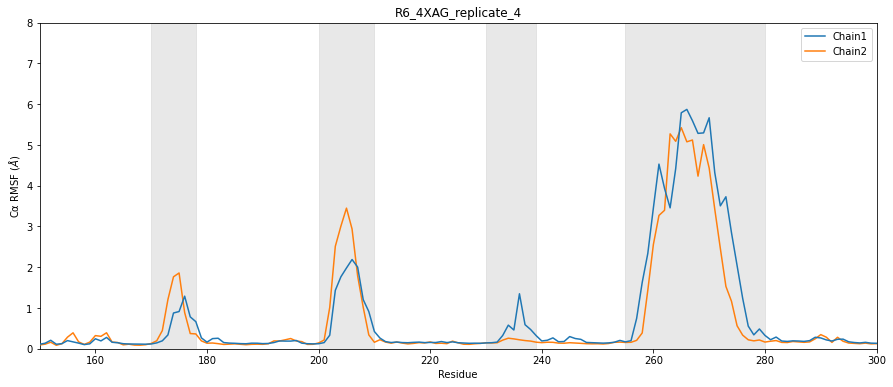

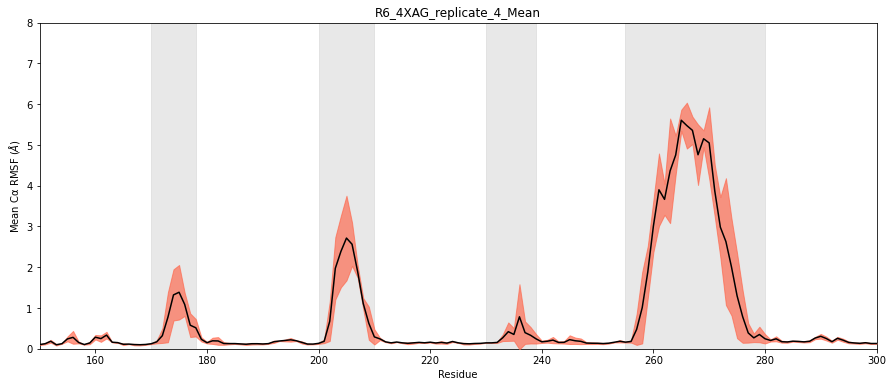

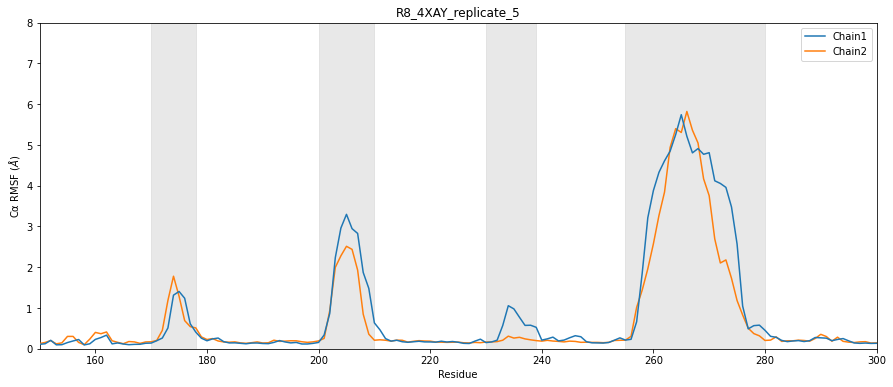

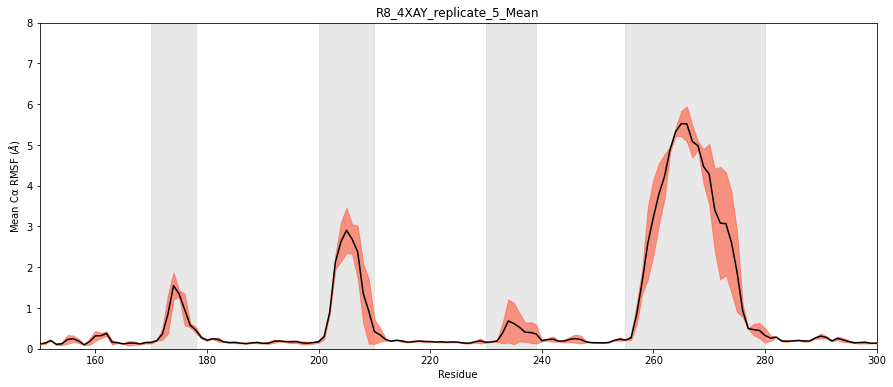

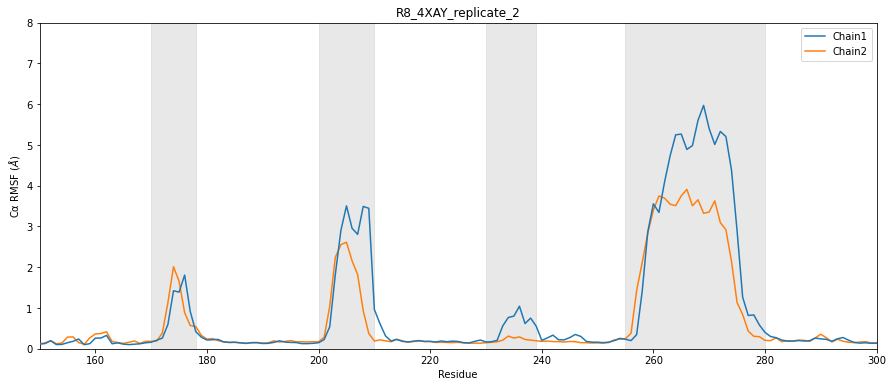

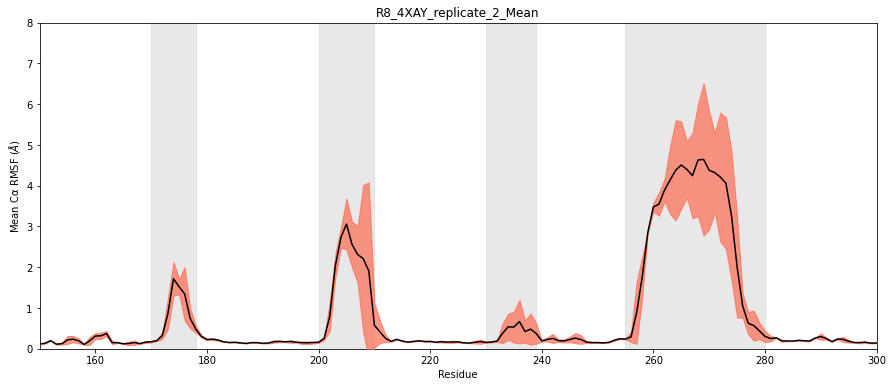

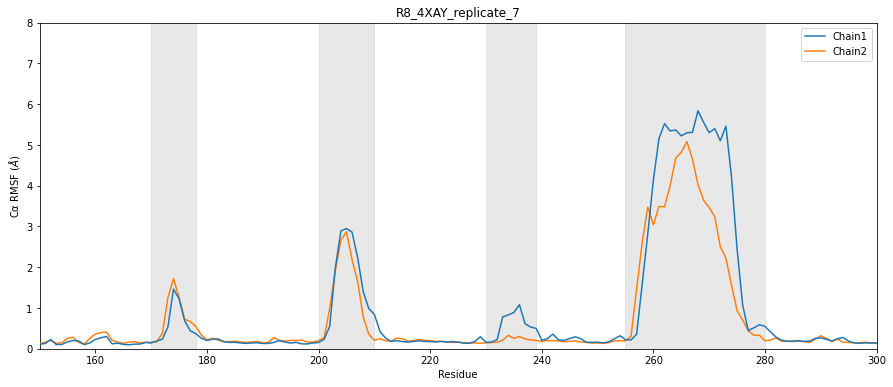

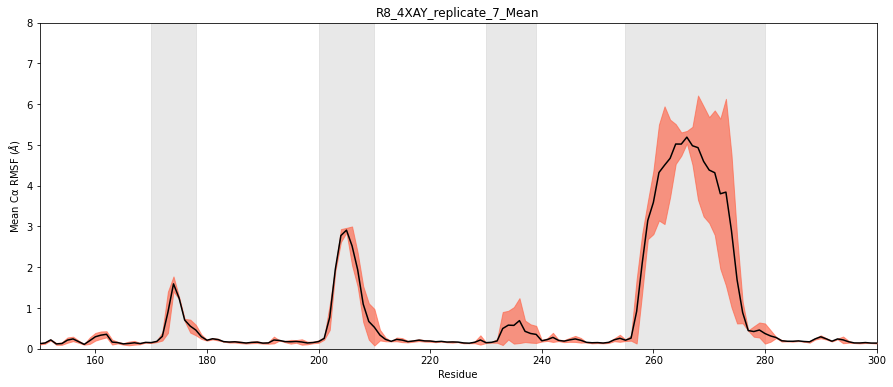

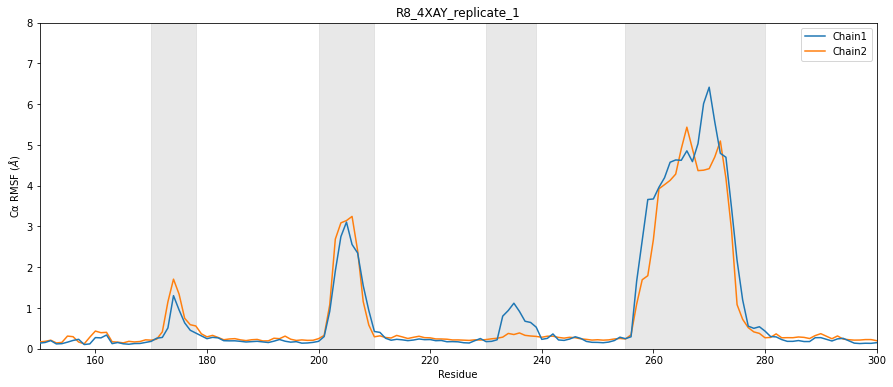

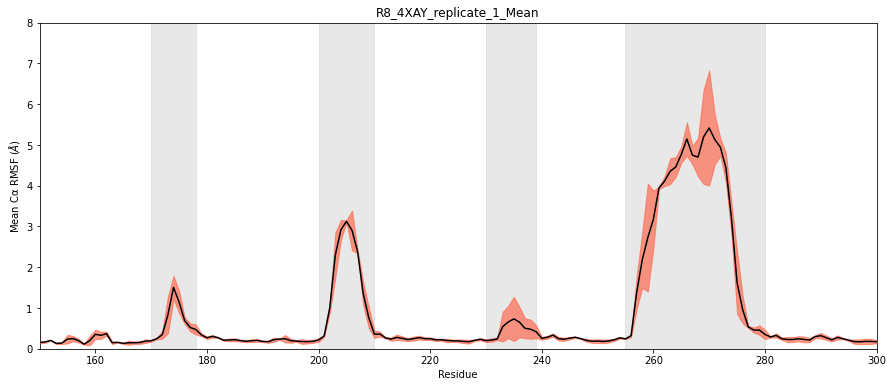

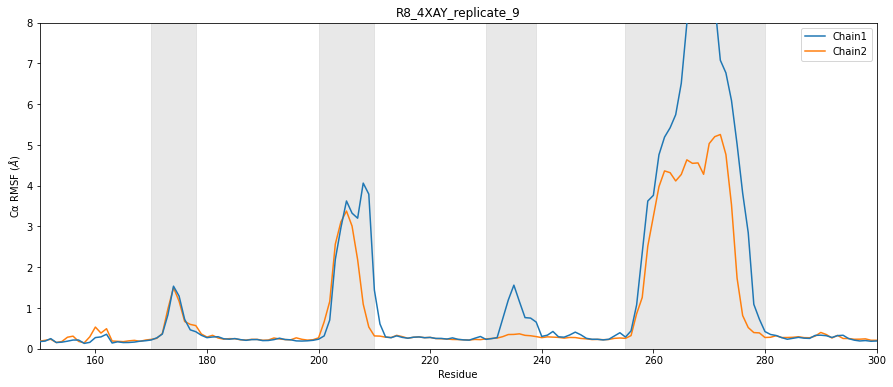

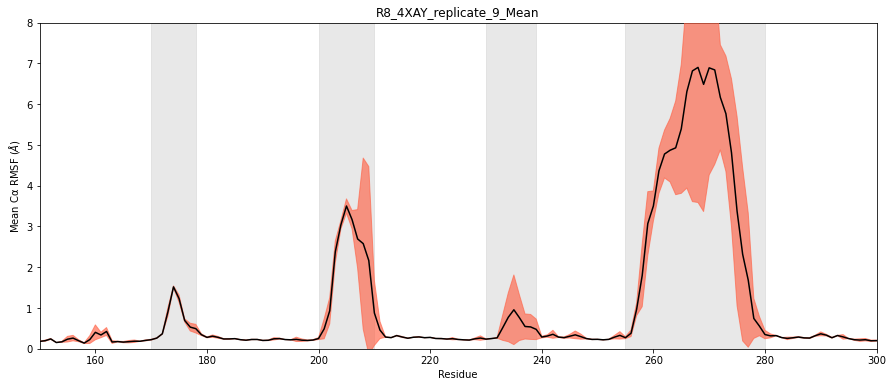

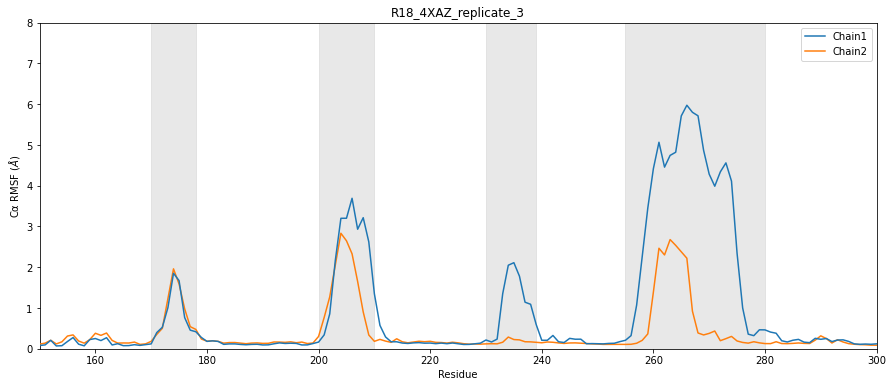

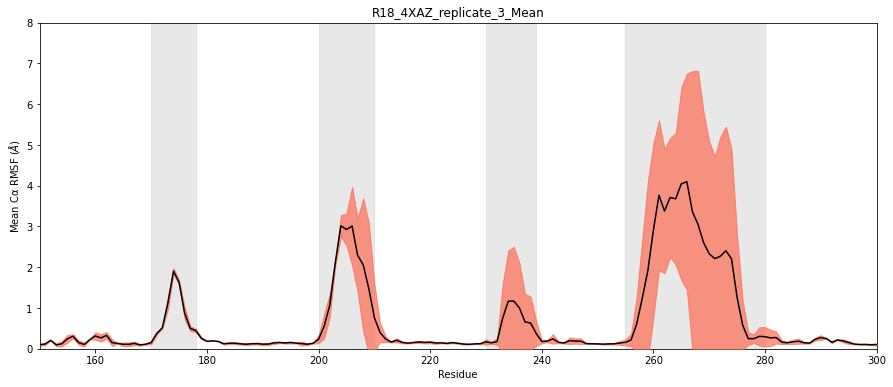

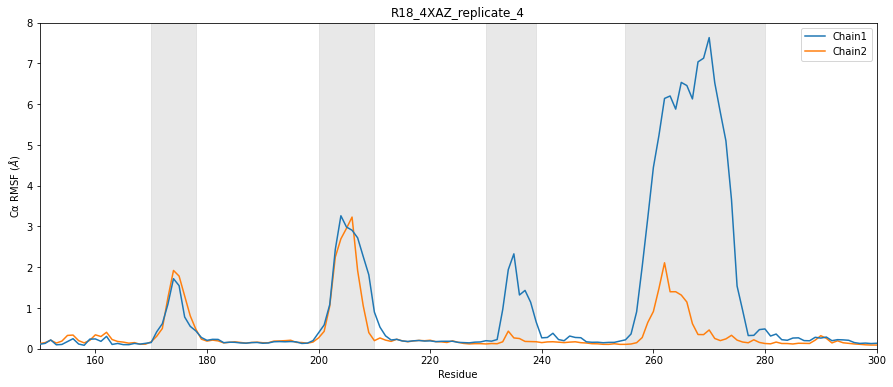

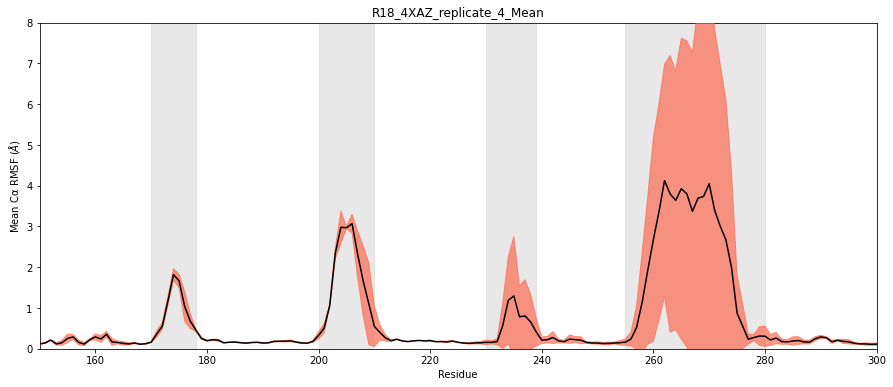

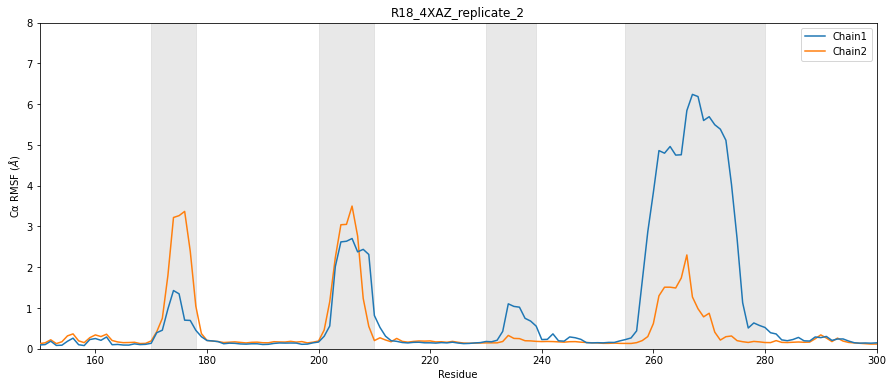

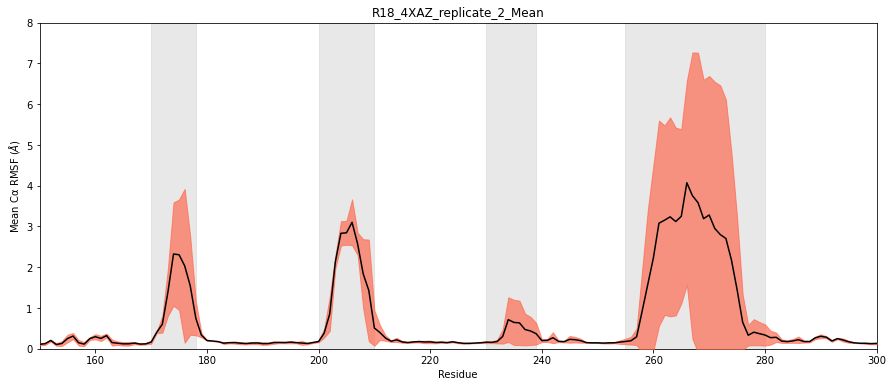

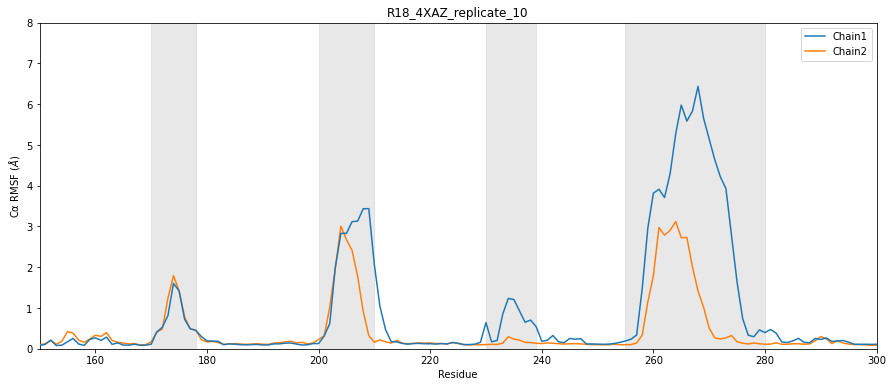

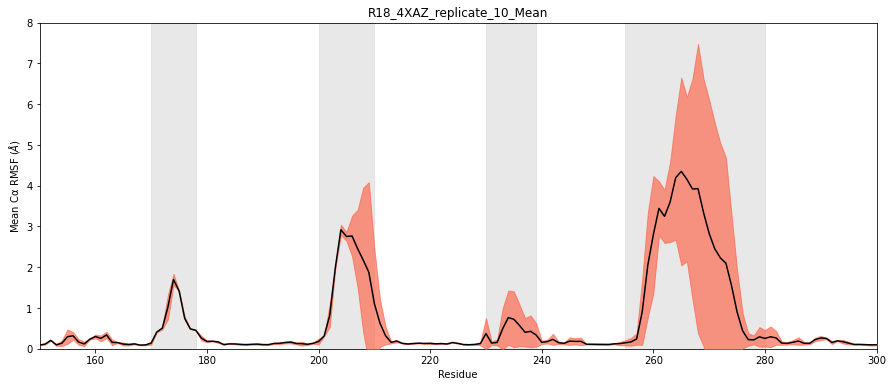

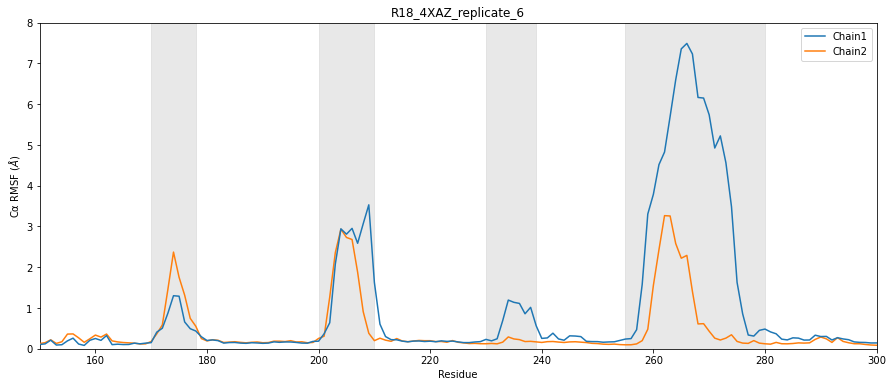

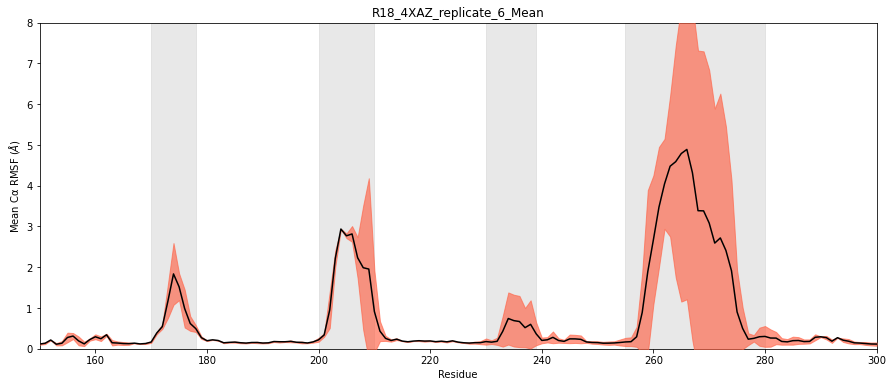

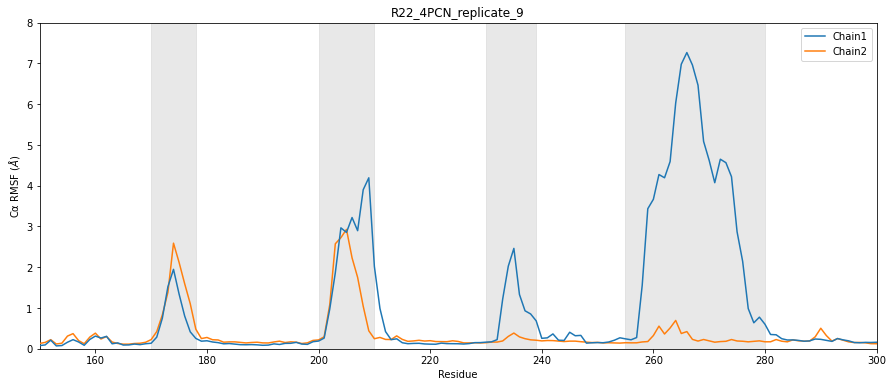

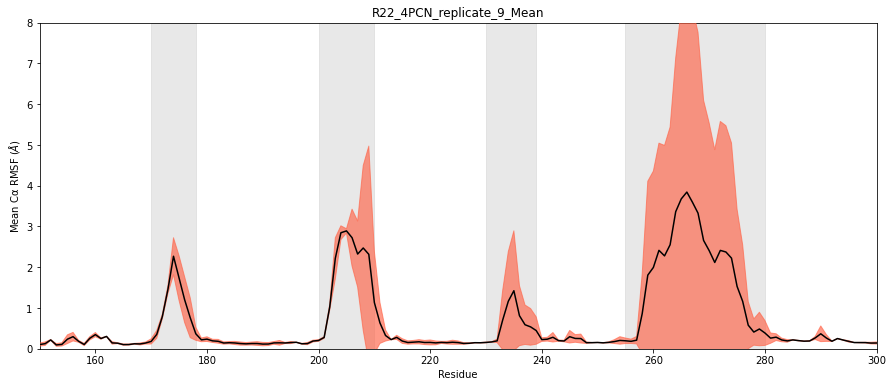

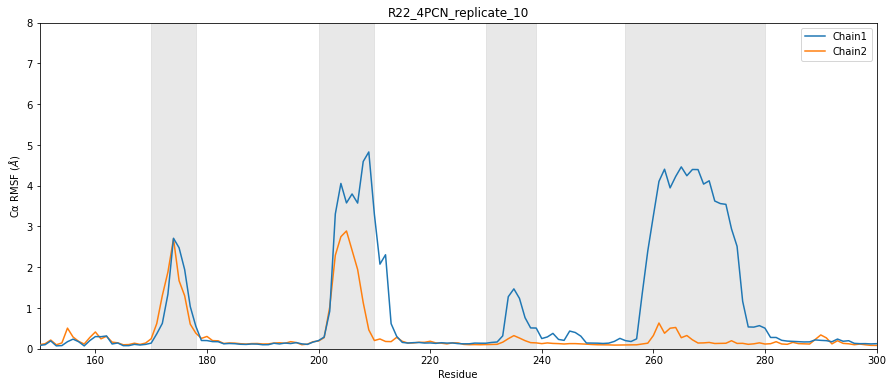

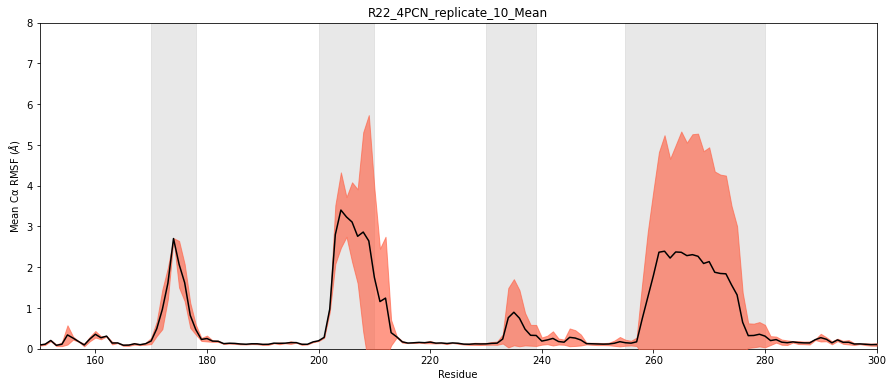

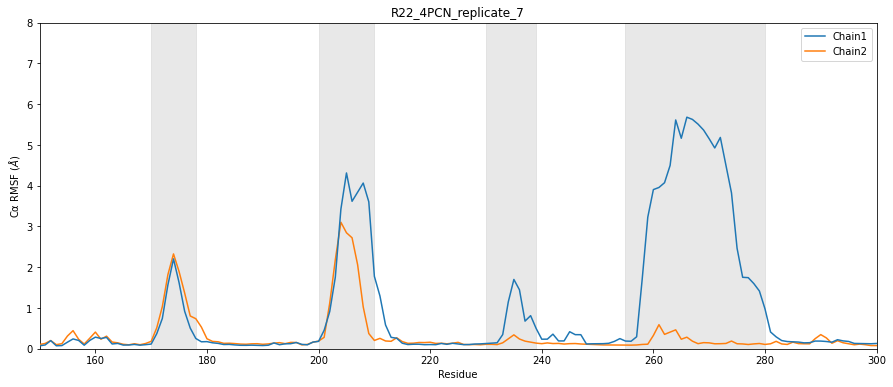

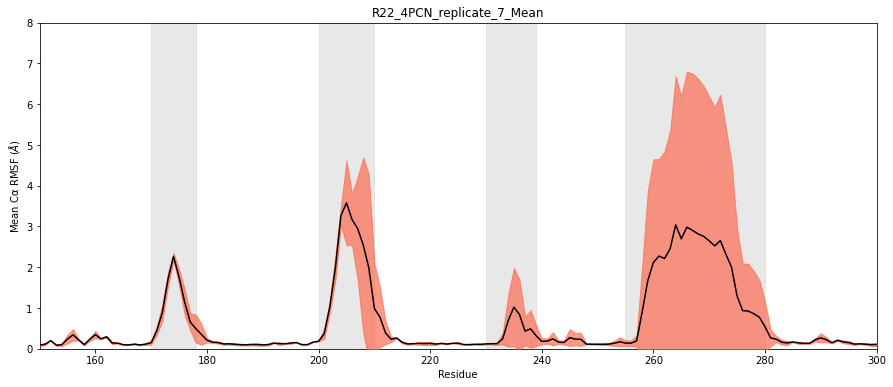

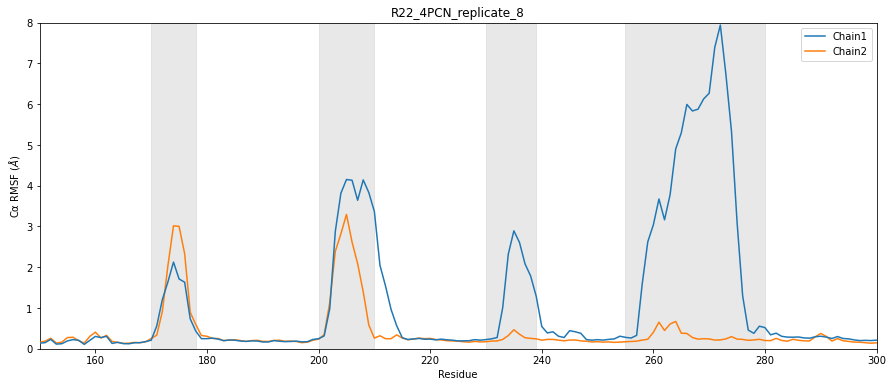

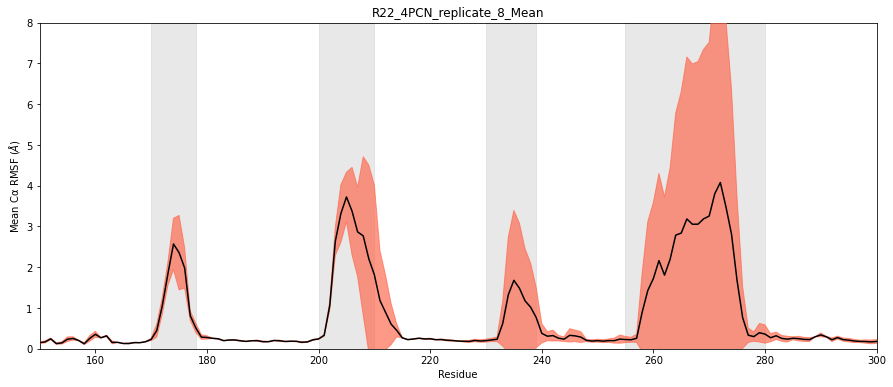

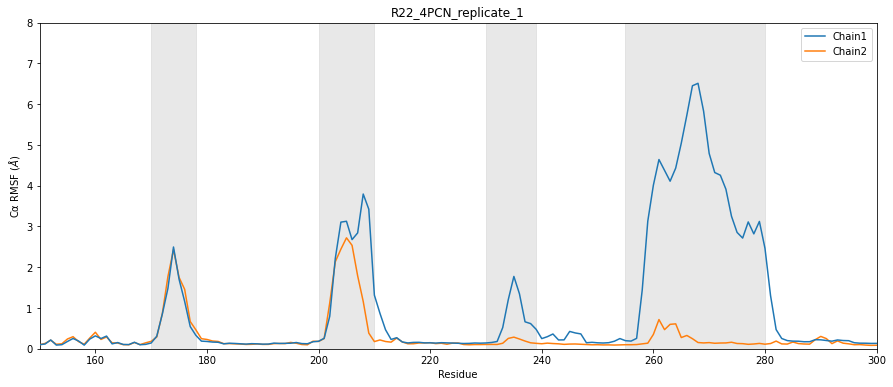

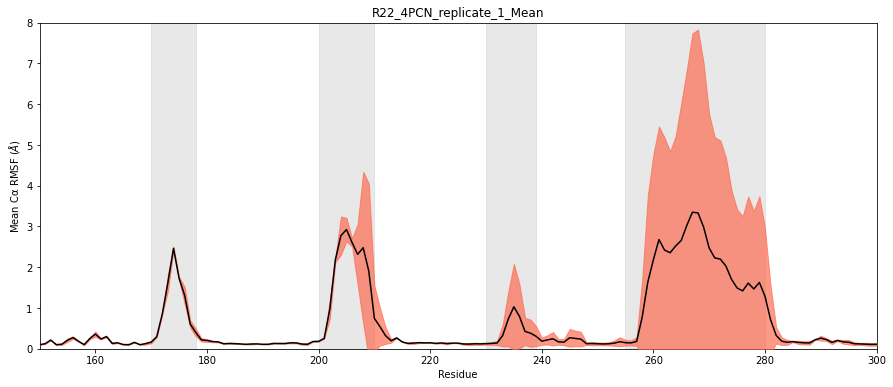

In [82]:


def analyseXVG_notav(xvgfile, elim=False):
    return np.array(aa.processrmsf_3(aa.processrmsf_2(aa.processrmsf_1(xvgfile)), eliminate=elim))

def plot_data(df, residue_col, y_col, label, color):
    for _, sub_df in df.groupby(df[y_col].isna().cumsum()):
        if not sub_df[y_col].isna().any():
            plt.plot(sub_df[residue_col], sub_df[y_col]*10, label=label, color=color)

data_path="/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/"

places = [331+i for i in range(len(Rtraj))]
figchains = plt.figure(figsize=(15,6))
count=1

color=iter(plt.cm.coolwarm(np.linspace(0,1,8)))

figchainAtraj = plt.figure(figsize=(15,6))
axAtraj = figchainAtraj.add_subplot(111)

figchainBtraj = plt.figure(figsize=(15,6))
axBtraj = figchainBtraj.add_subplot(111)

for pdb_id in Rtraj:
    count_index=count-1
    place=places[count_index]
    print(f"place is {place}")
    axchains = figchains.add_subplot(place)

    if count in [1,4,7]:
        axchains.set_ylabel(r'Mean Cα RMSF ($\AA$)')
    if count in [7,8,9]:
        axchains.set_xlabel(r'Residue')
    if count in [1,2,3]:
        axchains.text(169.5, 8.2, 'L4')
        axchains.text(202, 8.2, 'L5')
        axchains.text(230, 8.2, 'L6')
        axchains.text(263, 8.2, 'L7')    
    print(count)   

    print(f"working on {pdb_id}")
    d=f"{data_path}{pdb_id}"
    resrange = range(1, 400)
    name = pdb_dict[pdb_id]
    chain1df=pd.DataFrame(columns=["Residue", "rep_1","rep_2", "rep_3","rep_4", "rep_5"])
    chain2df=pd.DataFrame(columns=["Residue", "rep_1","rep_2", "rep_3","rep_4", "rep_5"])

    best_ones=find_min_Rfrees_names(d, 5)
    print(f"best for {pdb_id} are {best_ones}")
    if not os.path.isdir(f"{d}/best_replicates"):
        os.makedirs(f"{d}/best_replicates", exist_ok=True)
    # os.mkdirs(f"{d}/best_replicates", exist_ok=True)
    rep_count=1
    for rep in best_ones:
        filepath=f"{d}/replicates/{rep}/rmsf.xvg"
        datatest= analyseXVG_notav(filepath, elim=False)
        # average_data=aa.analyseXVG(filepath, elim=False)
    

        print("printing data")
        print(datatest)


        df = pd.DataFrame(datatest, columns=["Residue", "Chain1", "Chain2"])
        df[['Chain1', 'Chain2']] = df[['Chain1', 'Chain2']].apply(pd.to_numeric, errors='coerce')
        reptitle=str(f"rep_{rep_count}")
        print(f"REPTITLE ISSSSSS {reptitle}")
        chain1df["Residue"]=df["Residue"].copy()
        chain1df[reptitle]=df["Chain1"].copy()
        chain2df["Residue"]=df["Residue"].copy()
        chain2df[reptitle]=df["Chain2"].copy()
    
        # Calculate the mean for each residue position (ignoring NaN values)
        df['Mean'] = df[['Chain1', 'Chain2']].mean(axis=1)

        # Calculate the standard deviation for each residue position (ignoring NaN values)
        df['STD'] = df[['Chain1', 'Chain2']].std(axis=1)

        # Calculate the mean for each residue position
        # DF['Mean'] = df[["Chain1", "Chain2"]].mean(axis=1)
        # Calculate the standard deviation for each residue position
        #DF['STD'] = df[['Chain1', 'Chain2']].std(axis=1)
        df.to_csv(f"{d}/best_replicates/{rep}_reordered_rmsf.csv", index=False)
        df['Residue'] = df['Residue'].astype(int)
        # aDF = pd.DataFrame(average_dataset)
        # aDF.to_csv(f"{d}/{rep}/reordered_rmsf_average.csv")

        min_residue = df['Residue'].min()
        max_residue = df['Residue'].max()
        all_residues = range(min_residue, max_residue + 1)
        new_df = pd.DataFrame({'Residue': all_residues})
        merged_df = pd.merge(new_df, df, on='Residue', how='left')
        merged_df = merged_df.sort_values('Residue')
        merged_df.to_csv(f"{d}/best_replicates/{rep}_reordered_rmsf_consequetive.csv", index=False)

        # Filter the DataFrame for residues between 150 and 300
        filtered_df = merged_df[(merged_df['Residue'] >= 150) & (merged_df['Residue'] <= 300)]

        # First plot: Chain1*10 and Chain2*10 vs Residue number

        figA = plt.figure(figsize=(15,6))
        axA = figA.add_subplot(111)

        # plt.axvspan(200, 210, alpha=0.5, color='lightgrey', zorder=1)
        # plt.axvspan(170, 178, alpha=0.5, color='lightgray', zorder=1)
        # plt.axvspan(230, 239, alpha=0.5, color='lightgray', zorder=1)
        # plt.axvspan(255, 280, alpha=0.5, color='lightgray', zorder=1)

        axA.axvspan(200, 210, alpha=0.5, color='lightgrey', zorder=1)
        axA.axvspan(170, 178, alpha=0.5, color='lightgray', zorder=1)
        axA.axvspan(230, 239, alpha=0.5, color='lightgray', zorder=1)
        axA.axvspan(255, 280, alpha=0.5, color='lightgray', zorder=1)

        if d in del_loop:
            print("OH NO")
            axA.axvspan(264, 274, color='black', zorder=2, lw=None)
            filtered_df2 = filtered_df[filtered_df['Residue'] <= 264]
            filtered_df3 = filtered_df[filtered_df['Residue'] > 264]
            axA.plot(filtered_df2['Residue'], filtered_df2['Chain1']*10, label='Chain1', color="C0", zorder=4)
            axA.plot(filtered_df2['Residue'], filtered_df2['Chain2']*10, label='Chain2', color="C1", zorder=3)
            axA.plot(filtered_df3['Residue']+9, filtered_df3['Chain1']*10, color="C0", zorder=4)
            axA.plot(filtered_df3['Residue']+9, filtered_df3['Chain2']*10, color="C1", zorder=3)
        else: 
            axA.plot(filtered_df['Residue'], filtered_df['Chain1']*10, label='Chain1', zorder=4)
            axA.plot(filtered_df['Residue'], filtered_df['Chain2']*10, label='Chain2', zorder=3)

        # plot_data(filtered_df,'Residue', 'Chain1', 'Chain1',"C0")
        # plot_data(filtered_df,'Residue', 'Chain2', 'Chain2', "C1")

        axA.set_xlim([150, 300])
        axA.set_ylim([0, 8])

        axA.set_xlabel('Residue')
        axA.set_ylabel('Cα RMSF ($\AA$)')
        axA.set_title(f"{name}_{pdb_id}_{rep}")
        axA.legend()
        figA.savefig(f"{d}/best_replicates/{rep}.png")  
        figA.show()
    
        # #add to multiplot
        # if d in del_loop:
        #     print("OH NO")
        #     axchains.axvspan(264, 274, color='black', zorder=2)
        #     filtered_df2 = filtered_df[filtered_df['Residue'] <= 264]
        #     filtered_df3 = filtered_df[filtered_df['Residue'] >= 264]
        #     axchains.plot(filtered_df2['Residue'], filtered_df2['Chain1']*10, label='Chain1', color="C0", zorder=4)
        #     axchains.plot(filtered_df2['Residue'], filtered_df2['Chain2']*10, label='Chain2', color="C1", zorder=3)
        #     axchains.plot(filtered_df3['Residue']+9, filtered_df3['Chain1']*10, color="C0", zorder=4)
        #     axchains.plot(filtered_df3['Residue']+9, filtered_df3['Chain2']*10, color="C1", zorder=3)
        # else: 
        #     axchains.plot(filtered_df['Residue'], filtered_df['Chain1']*10, label='Chain1', zorder=4)
        #     axchains.plot(filtered_df['Residue'], filtered_df['Chain2']*10, label='Chain2', zorder=3)


        # axchains.axvspan(200, 210, alpha=0.5, color='lightgrey', zorder=1)
        # axchains.axvspan(170, 178, alpha=0.5, color='lightgray', zorder=1)
        # axchains.axvspan(230, 239, alpha=0.5, color='lightgray', zorder=1)
        # axchains.axvspan(255, 280, alpha=0.5, color='lightgray', zorder=1)
        # axchains.set_xlim([150, 300])
        # axchains.set_ylim([0, 7])
        # # axchains.set_title(f"{name}_{pdb_id}_{rep}")
        # axchains.text(160, 6, name, fontweight='bold')
        # # axchains.legend()

        # Second plot: Mean*10 with shaded standard deviation
        figB = plt.figure(figsize=(15,6))
        axB = figB.add_subplot(111)
        axB.axvspan(200, 210, alpha=0.5, color='lightgrey', zorder=1)
        axB.axvspan(170, 178, alpha=0.5, color='lightgray', zorder=1)
        axB.axvspan(230, 239, alpha=0.5, color='lightgray', zorder=1)
        axB.axvspan(255, 280, alpha=0.5, color='lightgray', zorder=1)
        if d in del_loop:
            print("OH NO")
            axB.plot(filtered_df2['Residue'], filtered_df2['Mean']*10, label='Chain1', color="k", zorder=4)
            axB.plot(filtered_df3['Residue']+9, filtered_df3['Mean']*10, color="k", zorder=4)
            axB.fill_between(filtered_df2['Residue'], (filtered_df2['Mean'] - filtered_df2['STD'])*10, (filtered_df2['Mean'] + filtered_df2['STD'])*10, color='tomato', alpha=0.65, zorder=3)
            axB.fill_between(filtered_df3['Residue']+9, (filtered_df3['Mean'] - filtered_df3['STD'])*10, (filtered_df3['Mean'] + filtered_df3['STD'])*10, color='tomato', alpha=0.65, zorder=3)
            axB.axvspan(264, 274, color='black', zorder=2, lw=None)
        else: 
            axB.plot(filtered_df['Residue'], filtered_df['Mean']*10, label='Mean*10', color="k", zorder=4)
            axB.fill_between(filtered_df['Residue'], (filtered_df['Mean'] - filtered_df['STD'])*10, (filtered_df['Mean'] + filtered_df['STD'])*10, color='tomato', alpha=0.65, zorder=3)


        # colors grey shaded areas
        axB.set_xlabel('Residue')
        axB.set_ylabel('Mean Cα RMSF ($\AA$)')
        axB.set_title(f"{name}_{pdb_id}_{rep}_Mean")
        axB.set_xlim([150, 300])
        axB.set_ylim([0, 8])
        # plt.legend()
        figB.savefig(f"{d}/best_replicates/{rep}_mean.png")
        figB.show()

        rep_count=rep_count+1


    chain1df['Mean'] = chain1df[["rep_1","rep_2", "rep_3","rep_4", "rep_5"]].mean(axis=1)
    chain2df['Mean'] = chain2df[["rep_1","rep_2", "rep_3","rep_4", "rep_5"]].mean(axis=1)
    chain1df['STD'] = chain1df[["rep_1","rep_2", "rep_3","rep_4", "rep_5"]].std(axis=1)
    chain2df['STD'] = chain2df[["rep_1","rep_2", "rep_3","rep_4", "rep_5"]].std(axis=1)
    chain1df['Residue'] = chain1df['Residue'].astype(int)
    chain2df['Residue'] = chain2df['Residue'].astype(int)
    

    min_residue1 = chain1df['Residue'].min()
    max_residue1 = chain1df['Residue'].max()
    all_residues1 = range(min_residue1, max_residue1 + 1)
    new_df1 = pd.DataFrame({'Residue': all_residues1})
    merged_df1 = pd.merge(new_df1, chain1df, on='Residue', how='left')
    merged_df1 = merged_df1.sort_values('Residue')
    merged_df1.to_csv(f"/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/{name}_{pdb_id}_chain1.csv", index=False)

    min_residue2 = chain2df['Residue'].min()
    max_residue2 = chain2df['Residue'].max()
    all_residues2 = range(min_residue2, max_residue2 + 1)
    new_df2 = pd.DataFrame({'Residue': all_residues2})
    merged_df2 = pd.merge(new_df2, chain2df, on='Residue', how='left')
    merged_df2 = merged_df2.sort_values('Residue')
    merged_df2.to_csv(f"/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/{name}_{pdb_id}_chain2.csv", index=False)

    # Filter the DataFrame for residues between 150 and 300
    filtered_dfchain1 = merged_df1[(merged_df1['Residue'] >= 150) & (merged_df1['Residue'] <= 300)]
    filtered_dfchain2 = merged_df2[(merged_df2['Residue'] >= 150) & (merged_df2['Residue'] <= 300)]

    #add to multiplot
    
    if d in del_loop:
        axchains.axvspan(264, 273, color='black', zorder=2, lw=None)
        


        filtered_dfchain1_2 = filtered_dfchain1[filtered_dfchain1['Residue'] <= 264]
        filtered_dfchain1_3 = filtered_dfchain1[filtered_dfchain1['Residue'] > 264]
        filtered_dfchain2_2 = filtered_dfchain2[filtered_dfchain2['Residue'] <= 264]
        filtered_dfchain2_3 = filtered_dfchain2[filtered_dfchain2['Residue'] > 264]
        axchains.plot(filtered_dfchain1_2['Residue'], filtered_dfchain1_2['Mean']*10, label='Chain1', color="black", zorder=4)
        axchains.plot(filtered_dfchain1_3['Residue']+9, filtered_dfchain1_3['Mean']*10, color="black", zorder=4)
        axchains.plot(filtered_dfchain2_2['Residue'], filtered_dfchain2_2['Mean']*10, label='Chain2', color="tomato", zorder=4)
        axchains.plot(filtered_dfchain2_3['Residue']+9, filtered_dfchain2_3['Mean']*10, color="tomato", zorder=4)
        
        # axAtraj.plot(filtered_dfchain1_2['Residue'], filtered_dfchain1_2['Mean']*10, label=name, color=c, zorder=4)
        # axAtraj.plot(filtered_dfchain1_3['Residue']+9, filtered_dfchain1_3['Mean']*10, color=c, zorder=4)
        # axBtraj.plot(filtered_dfchain2_2['Residue'], filtered_dfchain2_2['Mean']*10, label=name, color=c, zorder=4)
        # axBtraj.plot(filtered_dfchain2_3['Residue']+9, filtered_dfchain2_3['Mean']*10, color=c, zorder=4)

    else: 
        axchains.plot(filtered_dfchain1['Residue'], filtered_dfchain1['Mean']*10, label='Chain1 Mean*10', color="black", zorder=4)
        axchains.plot(filtered_dfchain2['Residue'], filtered_dfchain2['Mean']*10, label='Chain2 Mean*10', color="tomato", zorder=4)
        if pdb_id in Rtraj:
            c=next(color)
            axAtraj.plot(filtered_dfchain1['Residue'], filtered_dfchain1['Mean']*10, label=name, color=c, zorder=4)
            axBtraj.plot(filtered_dfchain2['Residue'], filtered_dfchain2['Mean']*10, label=name, color=c, zorder=4)

    axchains.axvspan(200, 210, alpha=0.5, color='lightgrey', zorder=1)
    axchains.axvspan(170, 178, alpha=0.5, color='lightgray', zorder=1)
    axchains.axvspan(230, 239, alpha=0.5, color='lightgray', zorder=1)
    axchains.axvspan(255, 280, alpha=0.5, color='lightgray', zorder=1)
    axchains.set_xlim([150, 300])
    axchains.set_ylim([0, 8])
    # axchains.set_title(f"{name}_{pdb_id}_{rep}")
    axchains.text(160, 6, name, fontweight='bold')
    # axchains.legend()
        
    count=count+1
    

figchains.savefig("/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/Rtraj-allchainsER.png")
figchains.show()

axAtraj.axvspan(200, 210, alpha=0.5, color='lightgrey', zorder=1)
axAtraj.axvspan(170, 178, alpha=0.5, color='lightgray', zorder=1)
axAtraj.axvspan(230, 239, alpha=0.5, color='lightgray', zorder=1)
axAtraj.axvspan(255, 280, alpha=0.5, color='lightgray', zorder=1)
axAtraj.set_xlim([150, 300])
axAtraj.set_ylim([0, 8])
axAtraj.set_title(f"Chain1")



axAtraj.text(172, 8.2, 'L4')
axAtraj.text(203, 8.2, 'L5')
axAtraj.text(234, 8.2, 'L6')
axAtraj.text(267, 8.2, 'L7')  
axAtraj.legend()
figchainAtraj.savefig("/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/Rtraj-allAER_vs.png")

axBtraj.axvspan(200, 210, alpha=0.5, color='lightgrey', zorder=1)
axBtraj.axvspan(170, 178, alpha=0.5, color='lightgray', zorder=1)
axBtraj.axvspan(230, 239, alpha=0.5, color='lightgray', zorder=1)
axBtraj.axvspan(255, 280, alpha=0.5, color='lightgray', zorder=1)
axBtraj.set_xlim([150, 300])
axBtraj.set_ylim([0, 8])
axBtraj.text(172, 8.2, 'L4')
axBtraj.text(203, 8.2, 'L5')
axBtraj.text(234, 8.2, 'L6')
axBtraj.text(267, 8.2, 'L7')  
axBtraj.set_title(f"Chain2")





# axchains.set_title(f"{name}_{pdb_id}_{rep}")
axBtraj.legend()
figchainBtraj.savefig("/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/Rtraj-allBER_vs.png")


# axchains.legend()


In [78]:
merged_df1

Residue   rep_1   rep_2   rep_3   rep_4   rep_5     Mean       STD
0         34     NaN     NaN     NaN     NaN     NaN      NaN       NaN
1         35     NaN     NaN     NaN     NaN     NaN      NaN       NaN
2         36  0.0766  0.0718  0.0936  0.1709  0.0922  0.10102  0.040206
3         37  0.0202  0.0175  0.0418  0.0717  0.0392  0.03808  0.021729
4         38  0.0165  0.0126  0.0191  0.0209  0.0154  0.01690  0.003230
..       ...     ...     ...     ...     ...     ...      ...       ...
323      357  0.0124  0.0112  0.0111  0.0171  0.0128  0.01292  0.002451
324      358  0.0112  0.0101  0.0105  0.0150  0.0126  0.01188  0.001987
325      359  0.0219  0.0203  0.0181  0.0236  0.0233  0.02144  0.002280
326      360  0.0237  0.0318  0.0243  0.0284  0.0671  0.03506  0.018210
327      361  0.1104  0.1078  0.0962  0.0664  0.1141  0.09898  0.019404

[328 rows x 8 columns]

In [41]:
places = [331+i for i in range(len(analysed_list))]

In [42]:
%matplotlib inline

In [43]:
os.chdir('/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016')

In [44]:
pdb2name = {'001_R0_4PCP':'R0', '002_R1_4XAF':'R1', '003_R2_4XD5':'R2', '004_R6_4XAG':'R6', '005_R8_4XAY':'R8', '006_R18_4XAZ':'R18', '007_R22_4PCN':'R22',
           '5wcr':'S1delL7', '5wj0':'S5_254R'}
pdb2name2 = {'4PCP':'R0', '4XAF':'R1', '4XD5':'R2', '4XAG':'R6', '4XAY':'R8', '4XAZ':'R18', '4PCN':'R22',
           '5wcr':'S1delL7', '5wj0':'S5_254R'}

1
2
3
4
5
6
7


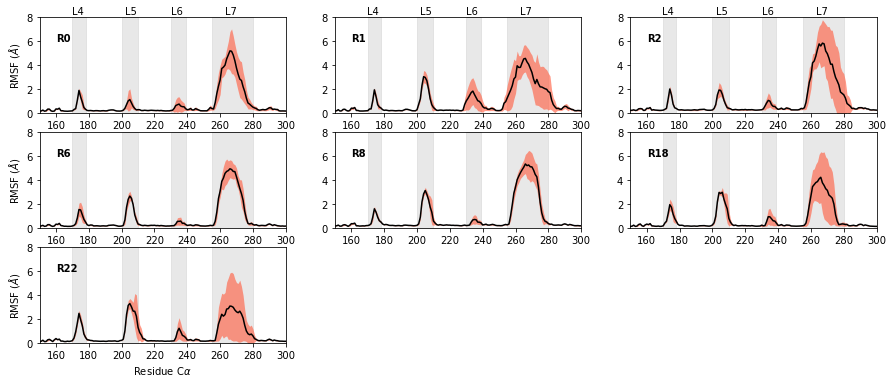

In [45]:
fig = plt.figure(figsize=(15,6))
count=1
for i in range(len(analysed_list)):
    
    titles = analysed_list[i][0].split('/')[-2]
    data = analysed_list[i][1]
    place = places[i]    
    name = pdb2name2[titles]
    ax = fig.add_subplot(place)
    
    ax.axvspan(200, 210, alpha=0.5, color='lightgrey', zorder=1)
    ax.axvspan(170, 178, alpha=0.5, color='lightgray', zorder=1)
    ax.axvspan(230, 239, alpha=0.5, color='lightgray', zorder=1)

    if count !=8:
        ax.axvspan(255, 280, alpha=0.5, color='lightgray', zorder=1)
    else: 
        ax.axvspan(255, 271, alpha=0.5, color='lightgray', zorder=1)

        
    if count in [1,4,7]:
      ax.set_ylabel(r'RMSF ($\AA$)')
    if count in [7,8,9]:
        ax.set_xlabel(r'Residue C$\alpha$')
    if count in [1,2,3]:
        ax.text(169.5, 8.2, 'L4')
        ax.text(202, 8.2, 'L5')
        ax.text(230, 8.2, 'L6')
        ax.text(263, 8.2, 'L7')    
    print(count)    
    count=count+1

    
    data1 = []
  
    for k in range(len(data[0][0][:,0])):
        if k != 0: 
            current    = int(data[0][0][:,0][k])
            previous   = int(data[0][0][:,0][k-1])
            previous_c = previous-1
            
            if current == previous_c:
                data1.append((int(data[0][0][:,0][k]), data[1][k], data[2][k]))
            else:
                difference=current-previous
                for l in range(difference-1):
                    data1.append(('nan', 'nan', 'nan'))
                data1.append((int(data[0][0][:,0][k]), data[1][k], data[2][k]))
                
                
                
    data1  = np.array(data1)            
    x_axis = np.array([float(i) for i in data1[:,0]])
    y_axis = np.array([float(i)*10 for i in data1[:,1]])
    s_err  = np.array([float(i)*10 for i in data1[:,2]])
        
    
    csv_filename=f"~/Desktop/Bfact/{name}_meanB_csv.csv"
    csv_filename2=f"~/Desktop/Bfact/_{name}_meanB.txt"

    csv_df=pd.DataFrame({'X':x_axis,'Y':y_axis})
    csv_df.to_csv(csv_filename, index=False)
    csv_df.to_csv(csv_filename2, index=False, header=False, columns=["Y"])    

    ax.plot(x_axis, y_axis, color='k', zorder=2)
    ax.text(160, 6, name, fontweight='bold')
    ax.set_ylim(0.0, 8)
    ax.set_xlim(150,300)
    #ax.set_xlabel('Residue')
    #ax.set_ylabel('RMSF (normalized)')
    ax.fill_between(x_axis, y_axis-s_err, y_axis+s_err, color='tomato', alpha=0.65,
                linewidth=0, zorder=2)

    plt.savefig('/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/ARG_pte_rmsfs_nolab.png', dpi=300)

In [46]:
all_parameters = []
for d in ordered:
    params = aa.getRefineParams(d)
    all_parameters.append(params)
all_parameters = np.array(all_parameters)

  tx = 1.0

  wxray_coupled_tbath_offset = 5.0

  ptls = 0.9

FINAL Rwork = 0.1300 Rfree = 0.1706 Rf/Rw = 1.3118

  tx = 0.6

  wxray_coupled_tbath_offset = 2.5

  ptls = 0.8

FINAL Rwork = 0.1499 Rfree = 0.1943 Rf/Rw = 1.2964

  tx = 0.3

  wxray_coupled_tbath_offset = 2.5

  ptls = 0.8

FINAL Rwork = 0.1335 Rfree = 0.1799 Rf/Rw = 1.3473

  tx = 0.6

  wxray_coupled_tbath_offset = 2.5

  ptls = 0.9

FINAL Rwork = 0.1371 Rfree = 0.1758 Rf/Rw = 1.2819

  tx = 1.0

  wxray_coupled_tbath_offset = 2.5

  ptls = 0.9

FINAL Rwork = 0.1372 Rfree = 0.1836 Rf/Rw = 1.3375

  tx = 1.0

  wxray_coupled_tbath_offset = 5.0

  ptls = 0.9

FINAL Rwork = 0.1389 Rfree = 0.1696 Rf/Rw = 1.2212

  tx = 1.0

  wxray_coupled_tbath_offset = 2.5

  ptls = 0.9

FINAL Rwork = 0.1305 Rfree = 0.1655 Rf/Rw = 1.2687



In [47]:
all_parameters_T = np.transpose(all_parameters)
mean_rFrees_T = np.transpose(aa.get_mean_Rfrees(ordered))

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates
replicate_3
0.1741
0.1344
Ensemble size :  56

replicate_4
0.1695
0.1302
Ensemble size :  84

replicate_5
0.1751
0.1331
Ensemble size :  84

replicate_2
0.1732
0.1324
Ensemble size :  72

replicate_7
0.1765
0.1337
Ensemble size :  84

replicate_9
0.1755
0.1329
Ensemble size :  63

replicate_10
0.1695
0.1294
Ensemble size :  84

replicate_8
0.1743
0.1335
Ensemble size :  72

replicate_1
0.1706
0.1300
Ensemble size :  84

replicate_6
0.1736
0.1343
Ensemble size :  56

/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates
replicate_6
['replicate_4', 'replicate_10', 'replicate_1', 'replicate_2', 'replicate_6', 'replicate_3', 'replicate_8', 'replicate_5', 'replicate_9', 'replicate_7']
/Users/u4855540/cloud

In [48]:
df1_indexes = ['model','mean_rfree', 'std_rfree', 'mean_rwork', 'std_rwork', 'mean_models', 
             'std_models']
df2_indexes = ['model','ptls', 'wxray', 'tx']

In [49]:
df1 = pd.DataFrame(mean_rFrees_T,index=df1_indexes, columns=mean_rFrees_T[0], )
df2 = pd.DataFrame(all_parameters_T,index=df2_indexes, columns=all_parameters_T[0], )

In [50]:
combined_df = pd.concat([df1, df2])

In [51]:
combined_df

4PCP                   4XAF  \
model                         4PCP                   4XAF   
mean_rfree     0.17128000000000002                 0.1858   
std_rfree     0.001781460075331463  0.0009859006035093003   
mean_rwork                 0.13126    0.14418000000000003   
std_rwork    0.0018282231811242308  0.0012998461447417567   
mean_models                   76.0                   70.2   
std_models      11.027239001672177     3.9191835884530852   
model                         4PCP                   4XAF   
ptls                           0.9                    0.8   
wxray                          5.0                    2.5   
tx                             1.0                    0.6   

                              4XD5                   4XAG  \
model                         4XD5                   4XAG   
mean_rfree     0.17806000000000002                0.17146   
std_rfree    0.0010209799214480177   0.001149956520917202   
mean_rwork                  0.1331    0.13355999999999998   
std_rwork    0.0007402702209328731  0.0012240914998479483   
mean_models                   47.2                   66.8   
std_models      3.4292856398964493      9.130169768410664   
model                         4XD5                   4XAG   
ptls                           0.8                    0.9   
wxray                          2.5                    2.5   
tx                             0.3                    0.6   

                              4XAY                   4XAZ  \
model                         4XAY                   4XAZ   
mean_rfree                 0.18292    0.16327999999999998   
std_rfree    0.0009703607576566566  0.0008009993757800296   
mean_rwork                 0.13794                0.13386   
std_rwork    0.0006770524351924308  0.0009645724441430008   
mean_models                   73.2                   79.2   
std_models       9.410632284814874     14.620533505997653   
model                         4XAY                   4XAZ   
ptls                           0.9                    0.9   
wxray                          2.5                    5.0   
tx                             1.0                    1.0   

                              4PCN  
model                         4PCN  
mean_rfree     0.16463999999999998  
std_rfree    0.0007172168430816502  
mean_rwork     0.12930000000000003  
std_rwork    0.0007348469228349564  
mean_models                   77.4  
std_models        8.56971411425142  
model                         4PCN  
ptls                           0.9  
wxray                          2.5  
tx                             1.0

In [52]:
combined_df.to_csv('table.csv')

In [53]:
##analysed_list = analysed_list[:-2]

In [54]:
analysed_list

[('/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/4PCP/replicates',
  (array([[[3.4000e+01, 3.9425e-01, 4.9150e-02],
           [3.5000e+01, 2.7035e-01, 9.6850e-02],
           [3.6000e+01, 1.0145e-01, 2.8750e-02],
           ...,
           [3.6100e+02, 1.5005e-01, 2.5050e-02],
           [3.6200e+02, 2.4730e-01, 4.6800e-02],
           [3.6300e+02, 3.9220e-01, 0.0000e+00]],
   
          [[3.4000e+01, 3.6125e-01, 7.0550e-02],
           [3.5000e+01, 2.4030e-01, 7.5300e-02],
           [3.6000e+01, 8.2200e-02, 1.8300e-02],
           ...,
           [3.6100e+02, 1.3800e-01, 1.6500e-02],
           [3.6200e+02, 3.2280e-01, 9.2000e-03],
           [3.6300e+02, 3.6230e-01, 0.0000e+00]],
   
          [[3.4000e+01, 3.1560e-01, 4.1600e-02],
           [3.5000e+01, 1.9480e-01, 2.0600e-02],
           [3.6000e+01, 9.1500e-02, 2.7200e-02],
           ...,
           [3.6100e+02, 1.9635

In [55]:
base_dir = '/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/'

In [56]:
os.chdir(base_dir)

7
0
4PCP
[ 35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.
  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.
  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.
  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.
  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104.
 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132.
 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146.
 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160.
 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174.
 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188.
 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202.
 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216.
 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 23

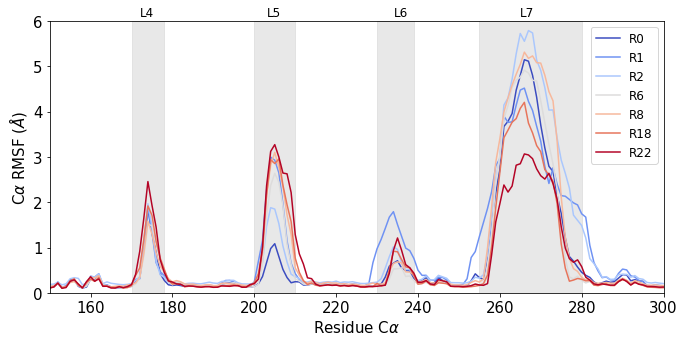

In [57]:
color=iter(plt.cm.coolwarm(np.linspace(0,1,7)))
count=1

fig = plt.figure(figsize=(11,5))
print(len(analysed_list))
ax = fig.add_subplot(111)
for i in range(len(analysed_list)):
    print(i)
    
    titles = analysed_list[i][0].split('/')[-2]
    print(titles)
    data = analysed_list[i][1]
    #place = places[i]    
    name = pdb2name2[titles]
    
    if count == 1:
        ax.axvspan(200, 210, alpha=0.5, color='lightgrey', zorder=1)
        ax.axvspan(170, 178, alpha=0.5, color='lightgray', zorder=1)
        ax.axvspan(230, 239, alpha=0.5, color='lightgray', zorder=1)
        ax.axvspan(255, 280, alpha=0.5, color='lightgray', zorder=1)
        ax.text(172, 6.1, 'L4', fontsize=12)
        ax.text(203, 6.1, 'L5', fontsize=12)
        ax.text(234, 6.1, 'L6', fontsize=12)
        ax.text(265, 6.1, 'L7', fontsize=12) 

    data1 = []
  
    for k in range(len(data[0][0][:,0])):
        if k != 0: 
            current    = int(data[0][0][:,0][k])
            previous   = int(data[0][0][:,0][k-1])
            previous_c = previous-1
            
            if current == previous_c:
                data1.append((int(data[0][0][:,0][k]), data[1][k], data[2][k]))
            else:
                difference=current-previous
                for l in range(difference-1):
                    data1.append(('nan', 'nan', 'nan'))
                data1.append((int(data[0][0][:,0][k]), data[1][k], data[2][k]))
                
                

        
    data1  = np.array(data1)            
    x_axis = np.array([float(i) for i in data1[:,0]])
    y_axis = np.array([float(i)*10 for i in data1[:,1]])
    s_err  = np.array([float(i) for i in data1[:,2]])
    print(x_axis)
    print(y_axis)
        
        
    c=next(color)
    ax.plot(x_axis, y_axis, label=name, c=c)
    ax.set_ylim(0, 6)
    ax.tick_params(axis='both', which='major', labelsize=15)

    ax.set_xlim(150,300)
    #ax.text(160, 0.5, titles+' aka '+name)

    #ax.fill_between(x_axis, y_axis-s_err, y_axis+s_err, color='tomato', alpha=0.65,
                #linewidth=0)
    count=count+1

ax.legend(loc='best', fontsize=12)
ax.set_xlabel(r'Residue C$\alpha$', fontsize=15)
ax.set_ylabel(r'C$\alpha$ RMSF ($\AA$)', fontsize=15)
plt.savefig('/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/RMSF_ARGTRAJ.png')

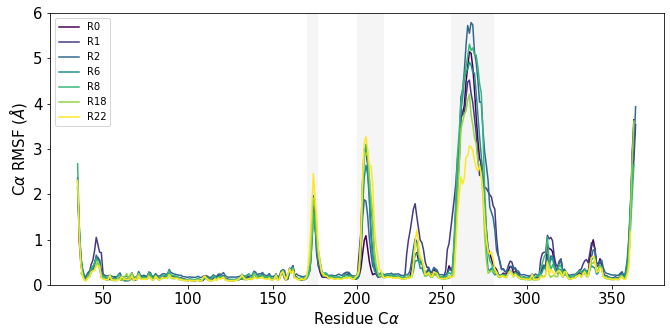

In [58]:
color=iter(plt.cm.viridis(np.linspace(0,1,7)))


fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111)
for i in range(len(analysed_list)):
    
    titles = analysed_list[i][0].split('/')[-2]
    data = analysed_list[i][1]
    #place = places[i]    
    name = pdb2name2[titles]
    

    ax.axvspan(255, 280, alpha=0.5, color='whitesmoke', zorder=1)
    ax.axvspan(200, 215, alpha=0.5, color='whitesmoke', zorder=1)
    ax.axvspan(170, 176, alpha=0.5, color='whitesmoke', zorder=1)

    data1 = []
  
    for k in range(len(data[0][0][:,0])):
        if k != 0: 
            current    = int(data[0][0][:,0][k])
            previous   = int(data[0][0][:,0][k-1])
            previous_c = previous-1
            
            if current == previous_c:
                data1.append((int(data[0][0][:,0][k]), data[1][k], data[2][k]))
            else:
                difference=current-previous
                for l in range(difference-1):
                    data1.append(('nan', 'nan', 'nan'))
                data1.append((int(data[0][0][:,0][k]), data[1][k], data[2][k]))
                
                
                
    data1  = np.array(data1)            
    x_axis = np.array([float(i) for i in data1[:,0]])
    y_axis = np.array([float(i)*10 for i in data1[:,1]])
    s_err  = np.array([float(i) for i in data1[:,2]])
        
        
    c=next(color)
    ax.plot(x_axis, y_axis, label=name, c=c)
    #ax.text(160, 0.5, titles+' aka '+name)
    ax.set_ylim(0, 6)
    ax.tick_params(axis='both', which='major', labelsize=15)

    #ax.set_xlim(150,300)
    ax.legend(loc='best')
    ax.set_xlabel(r'Residue C$\alpha$', fontsize=15)
    ax.set_ylabel(r'C$\alpha$ RMSF ($\AA$)', fontsize=15)
    #ax.fill_between(x_axis, y_axis-s_err, y_axis+s_err, color='tomato', alpha=0.65,
                #linewidth=0)
plt.savefig('/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/pte_rmsfs_coolwarm_all.png')

In [88]:
from Bio import PDB
import csv
import math

# sets dictionary for naming in figures

pdb_dir="/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/input_pdbs_renumbered"
csv_dir="/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/"

for pdb_id in Rtraj:
    lowerpdb_id=pdb_id.lower()
    filename=str(f"{pdb_dir}/{lowerpdb_id}.pdb")
    name = pdb_dict[pdb_id]
    csv_chain2=str(f"{csv_dir}/{name}_{pdb_id}_chain2.csv")
    print(f"working on {csv_chain2}")


    # Load the PDB structure
    pdb_parser = PDB.PDBParser(QUIET=True)
    structure = pdb_parser.get_structure('protein', filename)

    # Read the CSV file and create a dictionary with residue number as key and RMSF as value
    rmsf_dict = {}
    with open(csv_chain2, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            residue_number = int(row['Residue'])
            mean_rmsf = row['Mean']
            if mean_rmsf:
                rmsf = float(mean_rmsf)
                rmsf_dict[residue_number] = rmsf

    # Iterate through the residues in chain G and update B-factor values
    for model in structure:
        for chain in model:
            if chain.id == 'G':
                for residue in chain:
                    residue_number = residue.id[1]
                    if residue_number in rmsf_dict:
                        rmsf = rmsf_dict[residue_number]
                        for atom in residue:
                            if atom.get_name() == 'CA':
                                atom.set_bfactor((8 * math.pi**2) * (rmsf**2)*100)

    # Save the modified structure to a new PDB file
    io = PDB.PDBIO()

    # Set a filter to include only chain G
    class ChainGFilter(PDB.Select):
        def accept_chain(self, chain):
            return chain.id == 'G'

    io.set_structure(structure)
    io.save(f'/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016/pdbs_chain2rmsf/{name}_{pdb_id}_chain2rmsf_chainG.pdb', ChainGFilter())

    # io.set_structure(structure)
    # io.save(f'/Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/SERTRAJ/pdbs_chain2rsmf/{name}_{pdb_id}_chain2rmsf.pdb')

working on /Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016//R0_4PCP_chain2.csv
working on /Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016//R1_4XAF_chain2.csv
working on /Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016//R2_4XD5_chain2.csv
working on /Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016//R6_4XAG_chain2.csv
working on /Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PTE-Dynamics/data-notebooks_TO_SORT/211128_redo/2021_PTE-Paper/2021_PTE_ERAnalysis/ARGTRAJ/Campbell2016//R8_4XAY_chain2.csv
working on /Users/u4855540/cloudstor/Work/__PROJECTS/2021_NOBU_PT